In this notebook we visualize our data. Our main objective is to gain insights to facilitate the task of classifying different start types.

# Setup

In [1]:
#Imports
import numpy as np                    # Numerical operations
import pandas as pd                   # Data manipulation
from matplotlib import pyplot as plt  # Basic plotting
import seaborn as sns                 # Statistical visualizations
import scipy.stats as stats           # statistical distributions

#Path setup
import os                             # Operating system utilities
from pathlib import Path              # Object-oriented filesystem paths
notebook_path = Path().absolute()     # Current notebook location
project_root = notebook_path.parent   # Project root directory

# 1. Importing the Data

In [2]:
# reading the data from the gold layer
dfG = pd.read_csv(project_root/'data'/'gold'/'starG.csv')
dfG

identifier class subclass luminosity_class  \
0      19850119_J025942.96+011122.1     F       F0              NaN   
1      19850119_J025947.35+020834.1     A       A6               IV   
2      19850119_J030043.83+021812.4     A       A2                V   
3      19850119_J030336.54+025459.5     A       A7                V   
4      19861124_J025406.46+025537.7     A       A3                V   
...                             ...   ...      ...              ...   
21630  19830307_J145332.99-020651.5     A       A3               IV   
21631  19860518_J150420.63-012544.0     A       A7                V   
21632  19821001_J213339.08-082740.4     A       A7               IV   
21633  19821008_J210850.48-082114.5     A       A7               IV   
21634  19821008_J212231.01-074710.8     F       F0              NaN   

      full_class  recno        spt  effective_temperature_1  \
0             F0   2251  kA5hA8mA9                   7569.0   
1           A6IV   2254  kA4hA9mA9                   7124.0   
2            A2V   2273  kA3hA5mA7                      NaN   
3            A7V   2332  kA3hA6mA7                   7254.0   
4            A3V   2151  kA2hA4mA7                      NaN   
...          ...    ...        ...                      ...   
21630       A3IV  18473  kA2hA4mA7                      NaN   
21631        A7V  18498  kA3hA5mA7                   7475.0   
21632       A7IV  20746  kA7hF1mF1                      NaN   
21633       A7IV  20552  kA7hF0mF1                   7327.0   
21634         F0  20638  kA7hF2mF1                   7188.0   

       log_surface_gravity_1  metallicity_fe_h_1  visual_magnitude  \
0                      3.860               0.220            12.872   
1                      4.187              -0.367            14.712   
2                        NaN                 NaN            12.446   
3                      4.186              -0.467            12.935   
4                        NaN                 NaN            16.013   
...                      ...                 ...               ...   
21630                    NaN                 NaN            14.328   
21631                  4.119              -0.343            11.774   
21632                    NaN                 NaN            10.689   
21633                  4.017              -0.043             9.879   
21634                  3.966              -0.026            10.669   

       effective_temperature_2  log_surface_gravity_2  metallicity_fe_h_2  \
0                       7571.0                 4.1632              0.2220   
1                       7137.0                 3.8647             -0.3780   
2                       6234.0                 4.3243                 NaN   
3                       7232.0                 4.3071             -0.4705   
4                       6383.0                 4.3332                 NaN   
...                        ...                    ...                 ...   
21630                   7039.0                 3.4076             -0.6900   
21631                   7477.0                 4.2316             -0.3390   
21632                   7129.0                 4.1760                 NaN   
21633                   7330.0                 4.1473             -0.0530   
21634                   7188.0                 4.0805             -0.0291   

       radius   mass  luminosity   distance               lamost  \
0       1.820  1.760     9.80948  1171.0200  J025942.96+011122.1   
1       2.440  1.590    13.91443  3164.3701  J025947.35+020834.1   
2       1.254  1.210     2.13966   440.9360  J030043.83+021812.4   
3       1.480  1.620     5.39942   905.6660  J030336.54+025459.5   
4       1.277  1.280     2.43731  2151.9600  J025406.46+025537.7   
...       ...    ...         ...        ...                  ...   
21630   4.078  1.550    36.77406  4210.2002  J145332.99-020651.5   
21631   1.663  1.720     7.78983   717.9860  J150420.63-012544.0   
21632   1.705  1.590     6.76456   40

Our main objective is to classify the class, subclass and luminosity class of stars. That said, it is convenient to check the number of elements per class.

In [3]:
print( 'Different Classes:' + str( dfG['class'].unique() ) )
print( 'Different SubClasses:' + str( dfG['subclass'].unique() ) )
print( 'Different Luminosity Classes:' + str( dfG['luminosity_class'].unique() ) )

Different Classes:['F' 'A']
Different SubClasses:['F0' 'A6' 'A2' 'A7' 'A3' 'A9' 'A5' 'A1' 'F2' 'A8' 'A0']
Different Luminosity Classes:[nan 'IV' 'V' 'II']


In [4]:
print( 'Number of Class: ' + str(dfG['class'].nunique() ) )
print( 'Number of Sub Classes: ' + str(dfG['subclass'].nunique() ) )
print( 'Number of Luminosity Classes: ' + str(dfG['luminosity_class'].nunique() ) )
print( 'Number of Full Classes: ' + str(dfG['full_class'].nunique() ) )

Number of Class: 2
Number of Sub Classes: 11
Number of Luminosity Classes: 3
Number of Full Classes: 26


A concern is the fact that the data contains missing valeus. After dropping the missing values, the number count of classes is given by:

In [5]:
# Class statistics
print(f"Unique Classes: {dfG['class'].nunique()}")
print(f"Unique Subclasses: {dfG['subclass'].nunique()}")
print(f"Unique Luminosity Classes: {dfG['luminosity_class'].nunique()}")
print(f"Unique Full Classes: {dfG['full_class'].nunique()}")

# Missing value analysis for subclass vs effective_temperature_2
print("\nSUBCLASS vs EFFECTIVE_TEMPERATURE_2:")
for val in dfG['subclass'].dropna().unique():
    val_mask = dfG['subclass'] == val
    val_count = val_mask.sum()
    temp2_na = dfG.loc[val_mask, 'effective_temperature_2'].isna().sum()
    print(f"'{val}': {temp2_na/val_count:.1%} missing temp2 ({temp2_na} of {val_count})")

# Missing value analysis for luminosity_class vs visual_magnitude  
print("\nLUMINOSITY_CLASS vs VISUAL_MAGNITUDE:")
for val in dfG['luminosity_class'].dropna().unique():
    val_mask = dfG['luminosity_class'] == val
    val_count = val_mask.sum()
    mag_na = dfG.loc[val_mask, 'visual_magnitude'].isna().sum()
    print(f"'{val}': {mag_na/val_count:.1%} missing mag ({mag_na} of {val_count})")

Unique Classes: 2
Unique Subclasses: 11
Unique Luminosity Classes: 3
Unique Full Classes: 26

SUBCLASS vs EFFECTIVE_TEMPERATURE_2:
'F0': 6.7% missing temp2 (554 of 8304)
'A6': 12.0% missing temp2 (220 of 1833)
'A2': 15.0% missing temp2 (192 of 1277)
'A7': 8.6% missing temp2 (475 of 5552)
'A3': 16.7% missing temp2 (59 of 353)
'A9': 14.8% missing temp2 (20 of 135)
'A5': 8.3% missing temp2 (173 of 2091)
'A1': 8.2% missing temp2 (149 of 1827)
'F2': 10.5% missing temp2 (14 of 133)
'A8': 16.7% missing temp2 (21 of 126)
'A0': 0.0% missing temp2 (0 of 4)

LUMINOSITY_CLASS vs VISUAL_MAGNITUDE:
'IV': 6.9% missing mag (329 of 4791)
'V': 6.1% missing mag (487 of 8011)
'II': 10.6% missing mag (24 of 227)


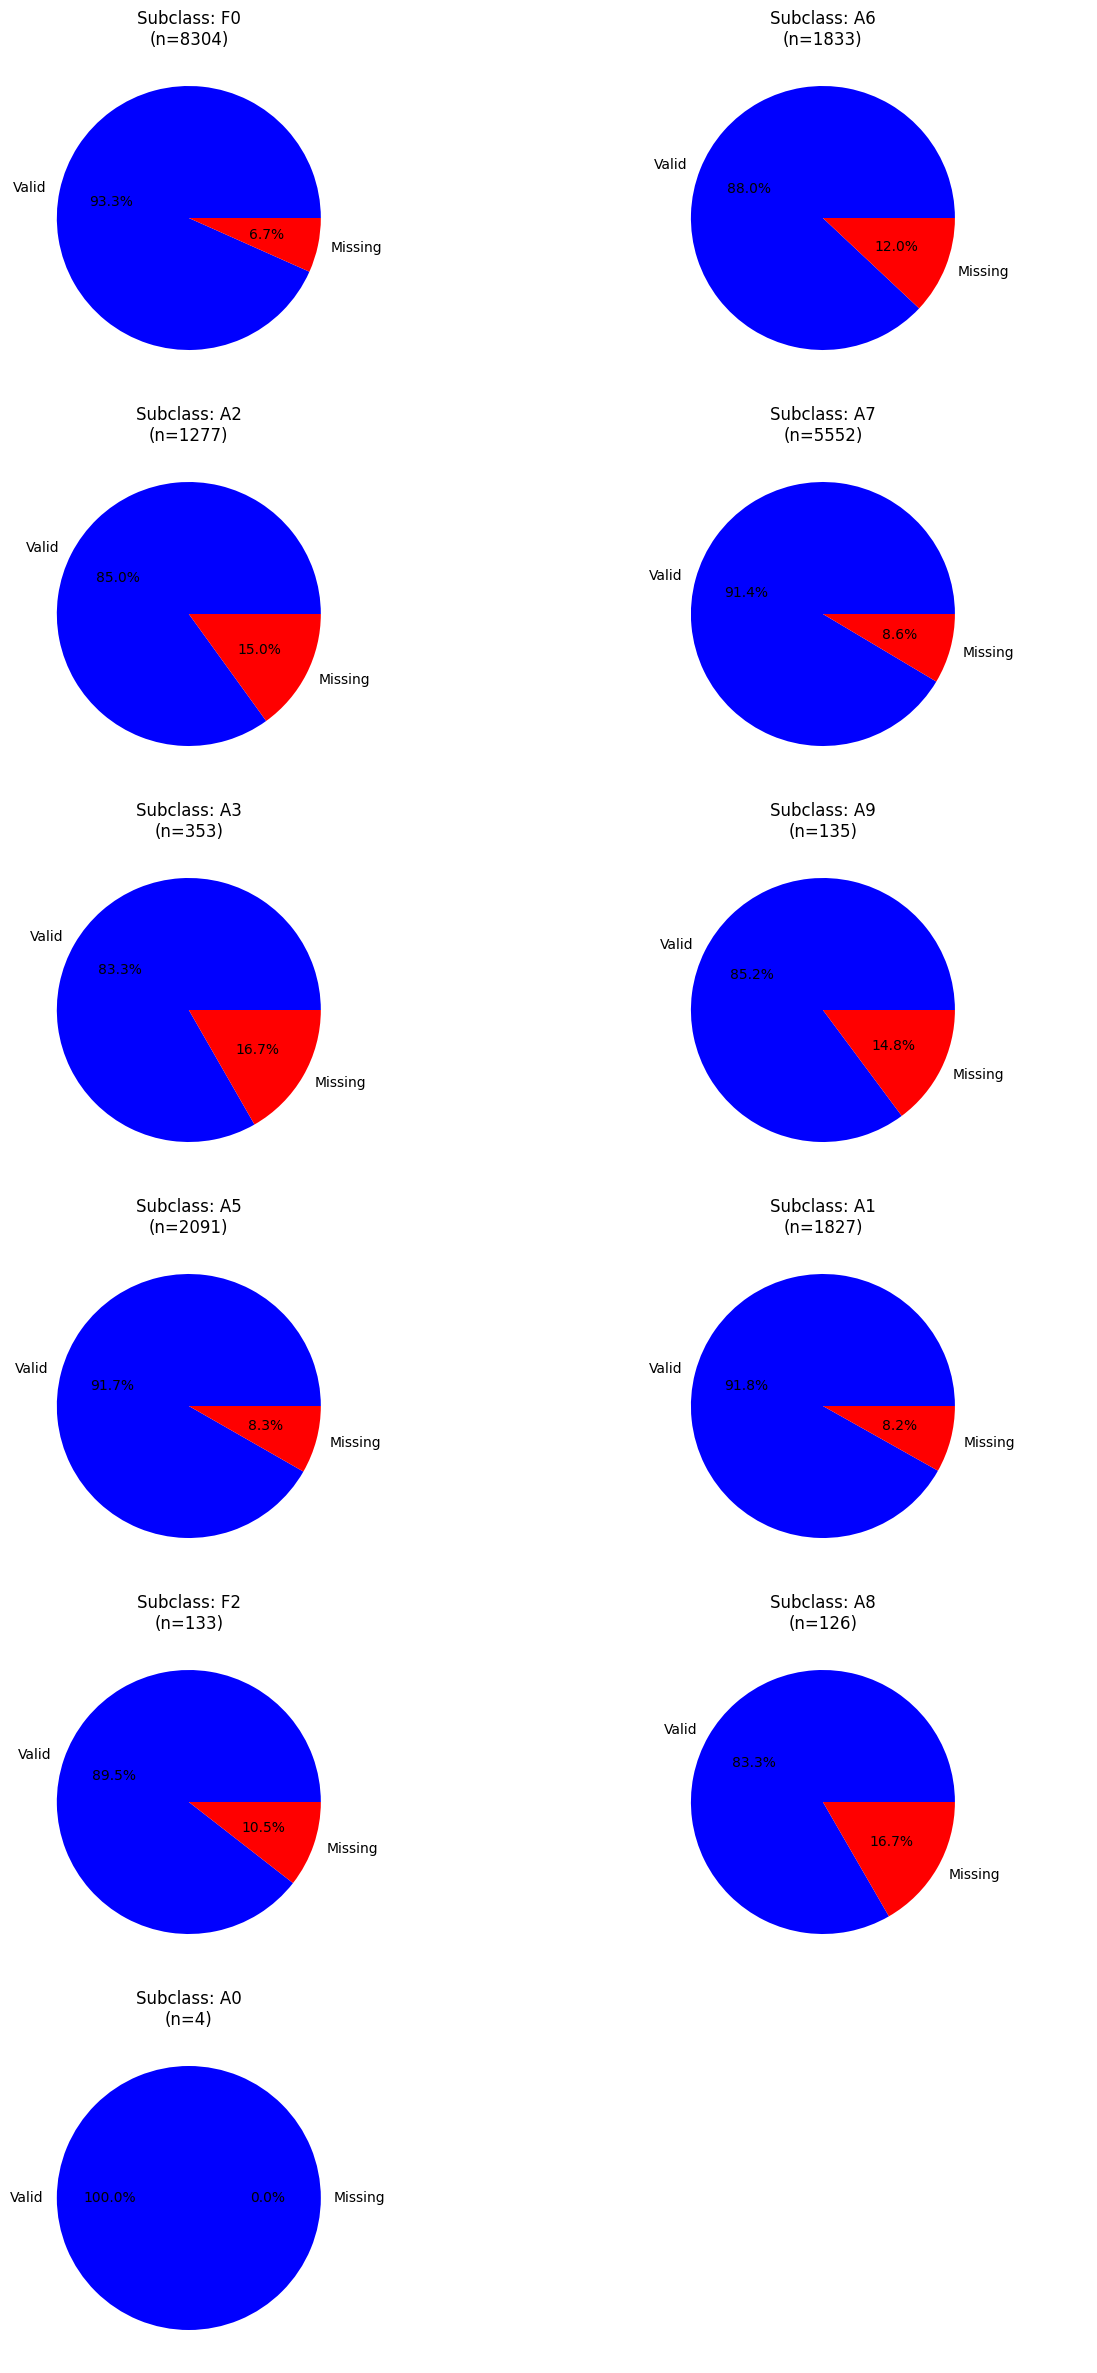

____________________________________________________________________________________________________________________________________________


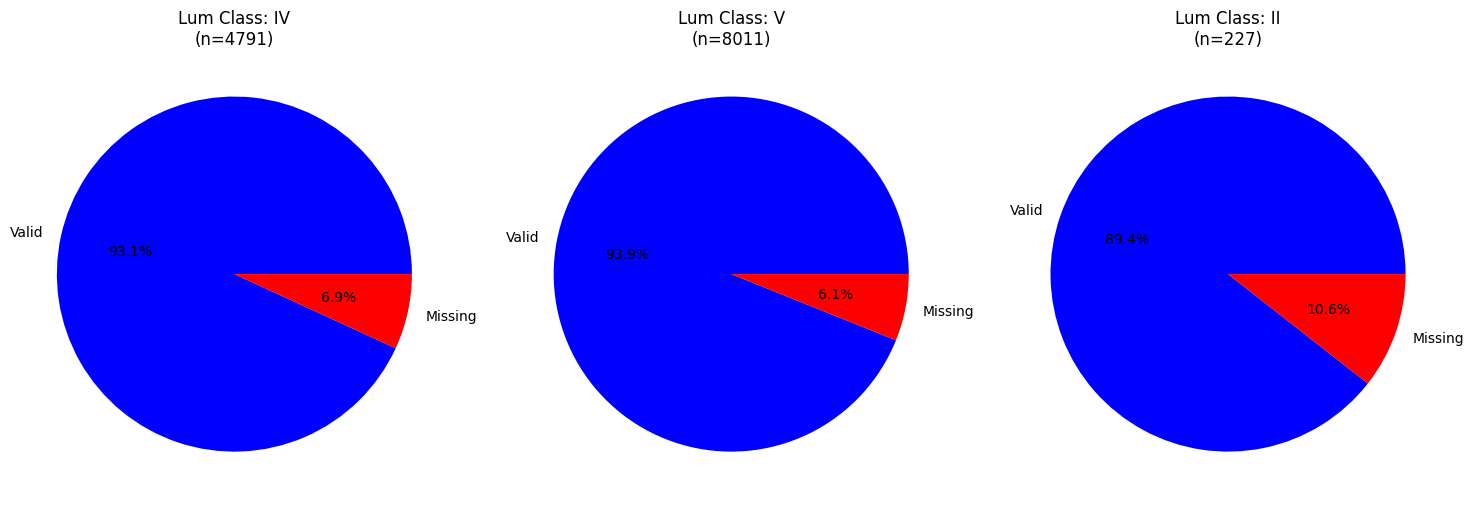

In [6]:
# Subclass analysis (including missing values)
subclass_values = dfG['subclass'].unique()
n_subclasses = len(subclass_values)
n_rows = (n_subclasses + 1) // 2

fig1, axes1 = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))
axes1 = axes1.flatten()

for i, val in enumerate(subclass_values):
    count = (dfG['subclass'] == val).sum()
    valid = count - dfG[dfG['subclass']==val]['effective_temperature_2'].isna().sum()
    
    if pd.isna(val):
        val_label = 'Missing'
    else:
        val_label = str(val)
    
    axes1[i].pie(
        [valid, count-valid],
        labels=['Valid', 'Missing'],
        colors=['blue', 'red'],
        autopct='%1.1f%%'
    )
    axes1[i].set_title(f"Subclass: {val_label}\n(n={count})")

for j in range(i+1, len(axes1)):
    axes1[j].axis('off')
plt.show()
# Luminosity class analysis (excluding missing values)
lum_values = dfG['luminosity_class'].dropna().unique()

print('____________________________________________________________________________________________________________________________________________')

fig2, axes2 = plt.subplots(1, len(lum_values), figsize=(15, 5))
if len(lum_values) == 1:  # Handle single plot case
    axes2 = [axes2]

for i, val in enumerate(lum_values):
    count = (dfG['luminosity_class'] == val).sum()
    valid = count - dfG[dfG['luminosity_class']==val]['visual_magnitude'].isna().sum()
    
    axes2[i].pie(
        [valid, count-valid],
        labels=['Valid', 'Missing'],
        colors=['blue', 'red'],
        autopct='%1.1f%%'
    )
    axes2[i].set_title(f"Lum Class: {val}\n(n={count})")

plt.tight_layout()
plt.show()

Now, it is also convenient to analyze the percentage of each category in our dataset.

Number of Class: 2
Number of Sub Classes: 11
Number of Luminosity Classes: 3
Number of Full Classes: 26


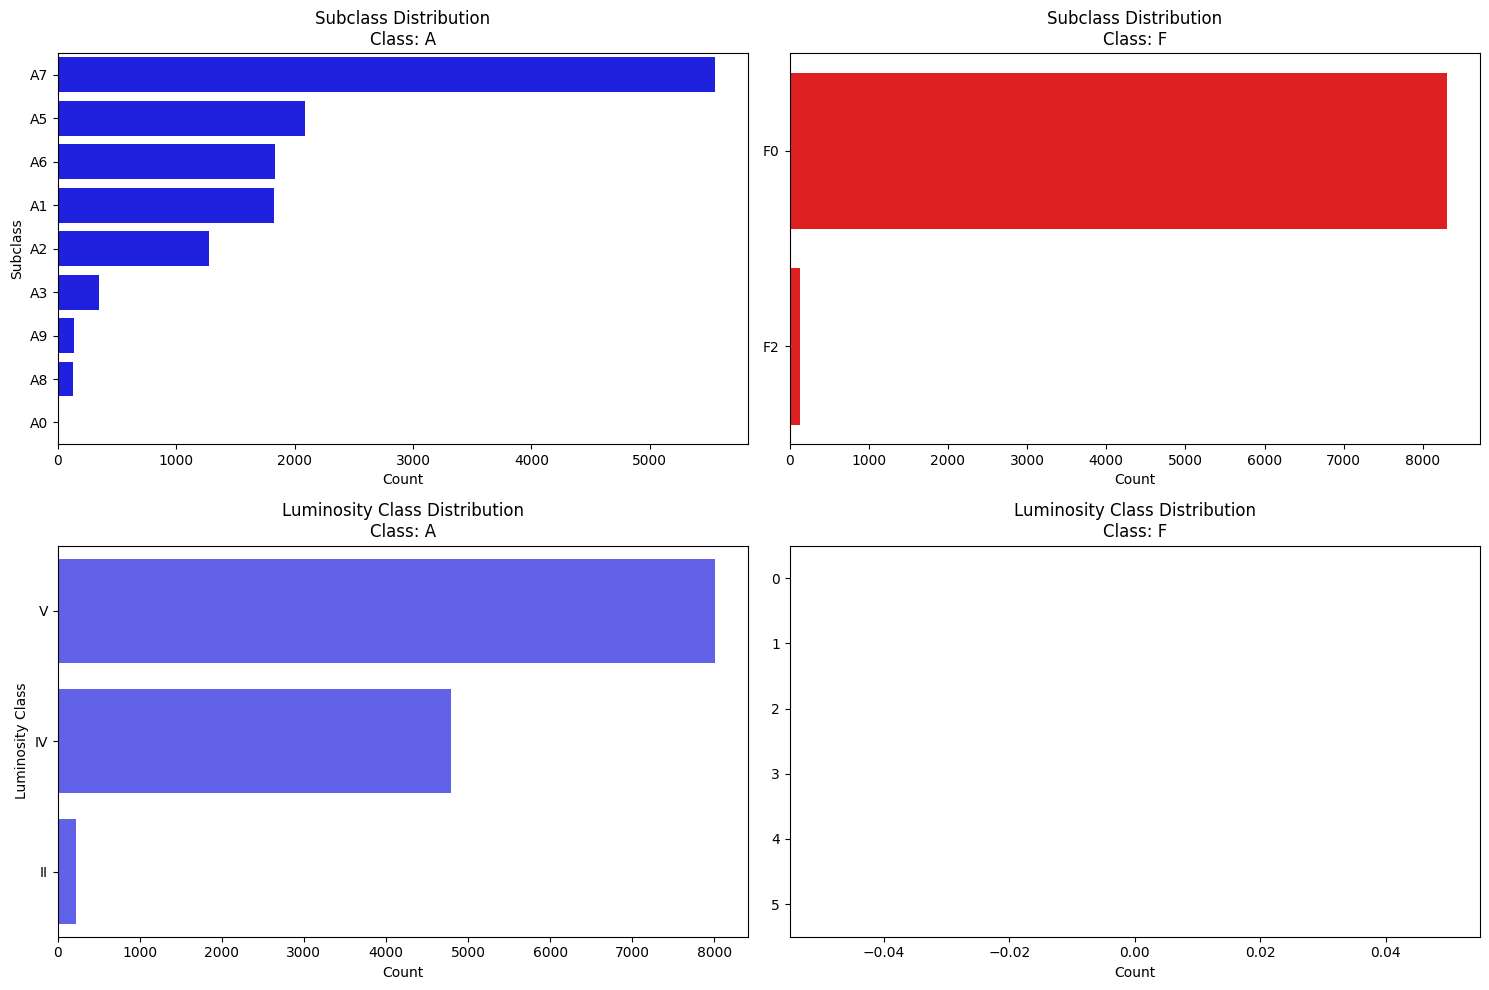

In [7]:
# Print basic counts
print('Number of Class:', dfG['class'].nunique())
print('Number of Sub Classes:', dfG['subclass'].nunique())
print('Number of Luminosity Classes:', dfG['luminosity_class'].nunique())
print('Number of Full Classes:', dfG['full_class'].nunique())

# Get top 2 classes
top_classes = dfG['class'].value_counts().index[:2]

# Create figure with 2 rows (subclasses and luminosity) and 2 columns (one per class)
plt.figure(figsize=(15, 10))

# First row: Subclass distributions
for i, class_name in enumerate(top_classes, 1):
    plt.subplot(2, 2, i)
    class_data = dfG[dfG['class'] == class_name]
    sns.countplot(data=class_data, y='subclass',
                 order=class_data['subclass'].value_counts().index,
                 color=['blue', 'red'][i-1])
    plt.title(f'Subclass Distribution\nClass: {class_name}')
    plt.xlabel('Count')
    plt.ylabel('Subclass' if i == 1 else '')

# Second row: Luminosity class distributions
for i, class_name in enumerate(top_classes, 3):
    plt.subplot(2, 2, i)
    class_data = dfG[dfG['class'] == class_name]
    sns.countplot(data=class_data, y='luminosity_class',
                 order=class_data['luminosity_class'].value_counts().index,
                 color=['blue', 'red'][i-3], alpha=0.7)
    plt.title(f'Luminosity Class Distribution\nClass: {class_name}')
    plt.xlabel('Count')
    plt.ylabel('Luminosity Class' if i == 3 else '')

plt.tight_layout()
plt.show()

Number of Class: 2
Number of Sub Classes: 11
Number of Luminosity Classes: 3
Number of Full Classes: 26


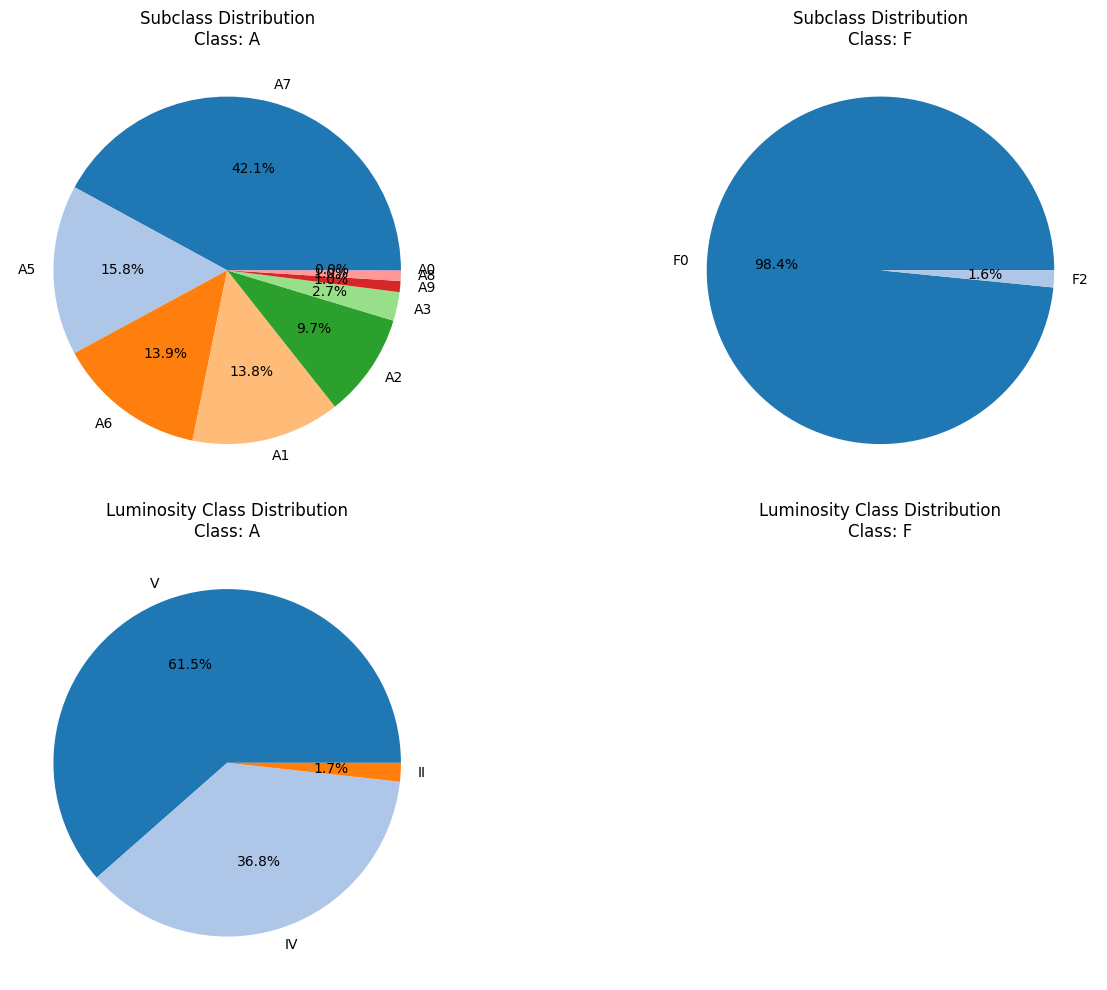

In [8]:
# Print basic counts
print('Number of Class:', dfG['class'].nunique())
print('Number of Sub Classes:', dfG['subclass'].nunique())
print('Number of Luminosity Classes:', dfG['luminosity_class'].nunique())
print('Number of Full Classes:', dfG['full_class'].nunique())

# Get top 2 classes
top_classes = dfG['class'].value_counts().index[:2]

# Create figure with 2 rows (subclasses and luminosity) and 2 columns (one per class)
plt.figure(figsize=(15, 10))

# First row: Subclass distributions
for i, class_name in enumerate(top_classes, 1):
    plt.subplot(2, 2, i)
    class_data = dfG[dfG['class'] == class_name]
    subclass_counts = class_data['subclass'].value_counts()
    plt.pie(subclass_counts, labels=subclass_counts.index, 
            colors=plt.cm.tab20.colors[:len(subclass_counts)],
            autopct='%1.1f%%')
    plt.title(f'Subclass Distribution\nClass: {class_name}')

# Second row: Luminosity class distributions
for i, class_name in enumerate(top_classes, 3):
    plt.subplot(2, 2, i)
    class_data = dfG[dfG['class'] == class_name]
    lum_counts = class_data['luminosity_class'].value_counts()
    plt.pie(lum_counts, labels=lum_counts.index,
            colors=plt.cm.tab20.colors[:len(lum_counts)],
            autopct='%1.1f%%')
    plt.title(f'Luminosity Class Distribution\nClass: {class_name}')

plt.tight_layout()
plt.show()

# 2. Features and Correlations

We now turn to analyze the correlation matrix to study the relations between the different features of our data. Our main aim is to understand the most important features for the later classification training. We begin by dropping the non-numerical features and encoding the categorical labels. Note that we perform said analysis in separate for the temperature and luminosity classes, for 

In [9]:
# convert categorical columns
df_numeric_T = dfG.drop(['identifier','spt','recno','date','lamost','luminosity_class'], axis=1).copy().dropna()    # Drop non-numeric columns and NA values
df_numeric_T['class'] = dfG['class'].astype('category').cat.codes                                # Encode class
df_numeric_T['full_class'] = dfG['full_class'].str[0:].astype('category').cat.codes              # Encode full_class
df_numeric_T['subclass'] = dfG['subclass'].str[0:].astype('category').cat.codes                  # Encode subclass
#df_numeric['luminosity_class'] = dfG['luminosity_class'].str[0:].astype('category').cat.codes   # Encode luminosity_class

df_numeric_T  # displays the transformed dataframe

class  subclass  full_class  effective_temperature_1  \
0          1         9          24                   7569.0   
1          0         5          14                   7124.0   
3          0         6          19                   7254.0   
8          0         5          14                   8371.0   
10         1         9          24                   7400.0   
...      ...       ...         ...                      ...   
21626      0         5          14                   8340.0   
21629      0         6          19                   7554.0   
21631      0         6          19                   7475.0   
21633      0         6          18                   7327.0   
21634      1         9          24                   7188.0   

       log_surface_gravity_1  metallicity_fe_h_1  visual_magnitude  \
0                      3.860               0.220            12.872   
1                      4.187              -0.367            14.712   
3                      4.186              -0.467            12.935   
8                      4.472              -0.349            13.887   
10                     3.981               0.204            12.573   
...                      ...                 ...               ...   
21626                  4.475               0.073            12.415   
21629                  4.036              -0.290            10.650   
21631                  4.119              -0.343            11.774   
21633                  4.017              -0.043             9.879   
21634                  3.966              -0.026            10.669   

       effective_temperature_2  log_surface_gravity_2  metallicity_fe_h_2  \
0                       7571.0                 4.1632              0.2220   
1                       7137.0                 3.8647             -0.3780   
3                       7232.0                 4.3071             -0.4705   
8                       8335.0                 4.4847             -0.3640   
10                      7403.0                 4.3046              0.2040   
...                        ...                    ...                 ...   
21626                   8280.0                 4.3271              0.0690   
21629                   7559.0                 3.9900             -0.2760   
21631                   7477.0                 4.2316             -0.3390   
21633                   7330.0                 4.1473             -0.0530   
21634                   7188.0                 4.0805             -0.0291   

       radius   mass  luminosity   distance  
0       1.820  1.760     9.80948  1171.0200  
1       2.440  1.590    13.91443  3164.3701  
3       1.480  1.620     5.39942   905.6660  
8       1.360  2.060     8.04498  1664.7900  
10      1.516  1.690     6.21710   770.9760  
...       ...    ...         ...        ...  
21626   1.623  2.040    11.15012  1018.4400  
21629   2.216  1.750    14.44529   530.9910  
21631   1.663  1.720     7.78983   717.9860  
21633   1.801  1.661     8.43666   311.7170  
21634   1.915  1.610     8.82033   404.1070  

[7983 rows x 14 columns]

We now compute and visualize the correlation and covariance matrices.

In [10]:
# correlation matrix
corr_matrix = df_numeric_T.corr()
corr_matrix

class  subclass  full_class  \
class                    1.000000  0.945286    0.864865   
subclass                 0.945286  1.000000    0.977091   
full_class               0.864865  0.977091    1.000000   
effective_temperature_1 -0.500186 -0.597380   -0.612272   
log_surface_gravity_1   -0.233701 -0.178463   -0.153589   
metallicity_fe_h_1       0.215920  0.194425    0.172652   
visual_magnitude        -0.226055 -0.210178   -0.186102   
effective_temperature_2 -0.487093 -0.581695   -0.595462   
log_surface_gravity_2   -0.092555 -0.077542   -0.066972   
metallicity_fe_h_2       0.217145  0.195992    0.174394   
radius                   0.012281 -0.015549   -0.027895   
mass                    -0.487349 -0.582714   -0.596783   
luminosity              -0.131897 -0.185446   -0.203887   
distance                -0.304576 -0.299983   -0.278990   

                         effective_temperature_1  log_surface_gravity_1  \
class                                  -0.500186              -0.233701   
subclass                               -0.597380              -0.178463   
full_class                             -0.612272              -0.153589   
effective_temperature_1                 1.000000              -0.224632   
log_surface_gravity_1                  -0.224632               1.000000   
metallicity_fe_h_1                      0.279378              -0.593879   
visual_magnitude                        0.074274               0.168832   
effective_temperature_2                 0.979689              -0.229957   
log_surface_gravity_2                   0.082214               0.279698   
metallicity_fe_h_2                      0.272447              -0.595684   
radius                                  0.050511              -0.301030   
mass                                    0.978589              -0.228032   
luminosity                              0.293254              -0.313332   
distance                                0.211517               0.023418   

                         metallicity_fe_h_1  visual_magnitude  \
class                              0.215920         -0.226055   
subclass                           0.194425         -0.210178   
full_class                         0.172652         -0.186102   
effective_temperature_1            0.279378          0.074274   
log_surface_gravity_1             -0.593879          0.168832   
metallicity_fe_h_1                 1.000000         -0.237063   
visual_magnitude                  -0.237063          1.000000   
effective_temperature_2            0.272756          0.075402   
log_surface_gravity_2             -0.140757          0.223049   
metallicity_fe_h_2                 0.986666         -0.235481   
radius                             0.160526         -0.188484   
mass                               0.270187          0.075080   
luminosity                         0.168462         -0.128607   
distance                          -0.130097          0.736160   

                         effective_temperature_2  log_surface_gravity_2  \
class                                  -0.487093              -0.092555   
subclass                               -0.581695              -0.077542   
full_class                             -0.595462              -0.066972   
effective_temperature_1                 0.979689               0.082214   
log_surface_gravity_1                  -0.229957               0.279698   
metallicity_fe_h_1                      0.272756              -0.140757   
visual_magnitude                        0.075402               0.223049   
effective_temperature_2                 1.000000               0.089971   
log_surface_gravity_2                   0.089971               1.000000   
metallicity_fe_h_2                      0.277251              -0.137868   
radius                                  0.045176              -0.969642   
mass                                    0.999306               0.087386   
luminosity                              0.291682              -0.

In [11]:
# Compute covariance matrix
cov_matrix = df_numeric_T.cov()
cov_matrix

class    subclass  full_class  \
class                      0.234728    0.832672    1.686880   
subclass                   0.832672    3.305650    7.151833   
full_class                 1.686880    7.151833   16.207187   
effective_temperature_1  -83.300848 -373.349085 -847.294750   
log_surface_gravity_1     -0.015307   -0.043867   -0.083593   
metallicity_fe_h_1         0.026194    0.088513    0.174042   
visual_magnitude          -0.140114   -0.488876   -0.958492   
effective_temperature_2  -82.357563 -369.090712 -836.597805   
log_surface_gravity_2     -0.011112   -0.034935   -0.066810   
metallicity_fe_h_2         0.026490    0.089726    0.176781   
radius                     0.003795   -0.018030   -0.071621   
mass                      -0.032481   -0.145745   -0.330506   
luminosity                -0.596100   -3.145214   -7.656773   
distance                -128.159779 -473.694816 -975.476863   

                         effective_temperature_1  log_surface_gravity_1  \
class                                 -83.300848              -0.015307   
subclass                             -373.349085              -0.043867   
full_class                           -847.294750              -0.083593   
effective_temperature_1            118160.422274             -10.439172   
log_surface_gravity_1                 -10.439172               0.018277   
metallicity_fe_h_1                     24.046653              -0.020104   
visual_magnitude                       32.663065               0.029201   
effective_temperature_2            117525.884044             -10.849608   
log_surface_gravity_2                   7.002892               0.009370   
metallicity_fe_h_2                     23.581308              -0.020278   
radius                                 11.073615              -0.025956   
mass                                   46.274968              -0.004241   
luminosity                            940.335437              -0.395154   
distance                            63147.332438               2.749654   

                         metallicity_fe_h_1  visual_magnitude  \
class                              0.026194         -0.140114   
subclass                           0.088513         -0.488876   
full_class                         0.174042         -0.958492   
effective_temperature_1           24.046653         32.663065   
log_surface_gravity_1             -0.020104          0.029201   
metallicity_fe_h_1                 0.062698         -0.075941   
visual_magnitude                  -0.075941          1.636691   
effective_temperature_2           23.834704         33.664903   
log_surface_gravity_2             -0.008734          0.070709   
metallicity_fe_h_2                 0.062208         -0.075856   
radius                             0.025635         -0.153788   
mass                               0.009307          0.013213   
luminosity                         0.393488         -1.534800   
distance                         -28.292270        817.955141   

                         effective_temperature_2  log_surface_gravity_2  \
class                                 -82.357563              -0.011112   
subclass                             -369.090712              -0.034935   
full_class                           -836.597805              -0.066810   
effective_temperature_1            117525.884044               7.002892   
log_surface_gravity_1                 -10.849608               0.009370   
metallicity_fe_h_1                     23.834704              -0.008734   
visual_magnitude                       33.664903               0.070709   
effective_temperature_2            121791.892815               7.780444   
log_surface_gravity_2                   7.780444               0.061403   
metallicity_fe_h_2                     24.363121              -0.008602   
radius                                 10.054909              -0.153239   
mass                                   47.975285               0.002979   
luminos

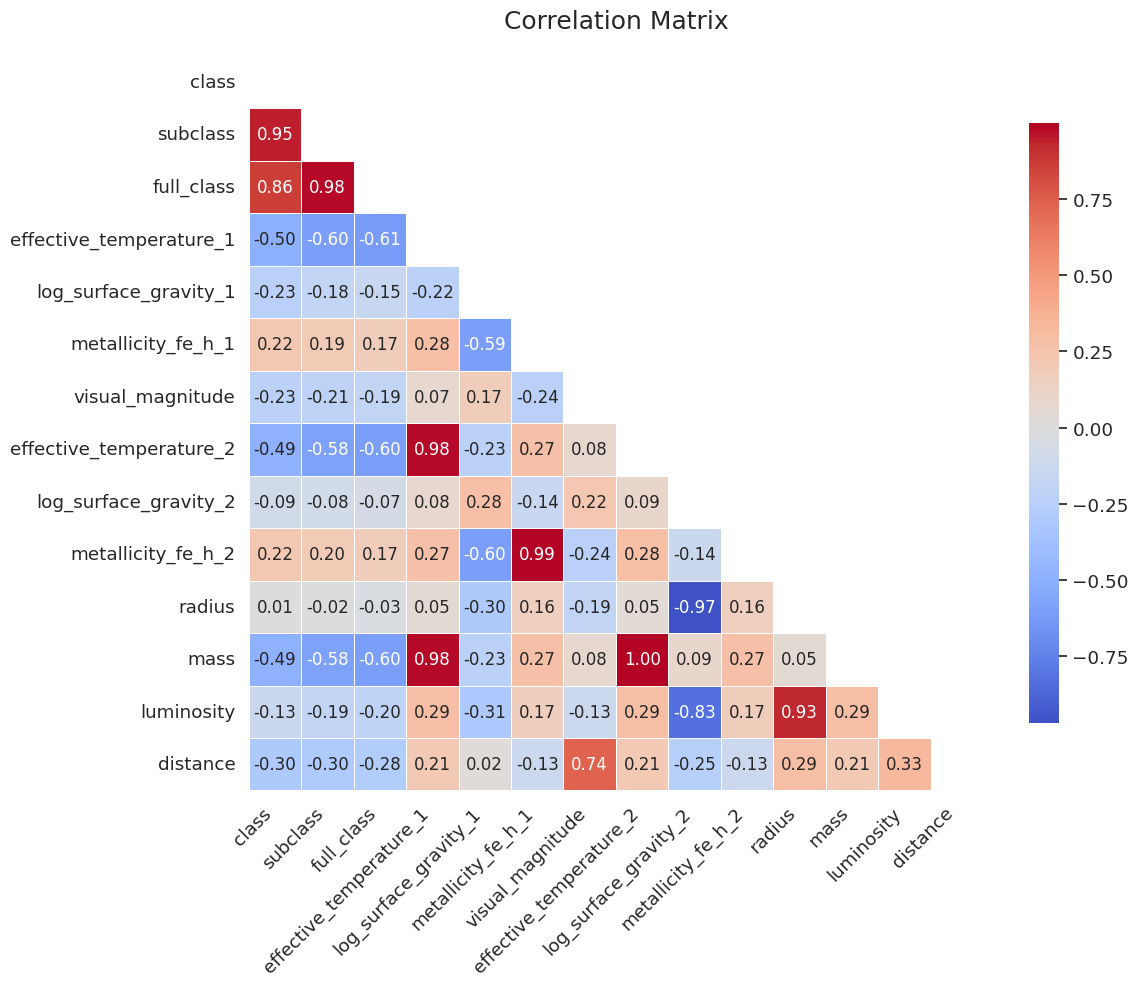

In [12]:
# Set style and context for better aesthetics
sns.set_theme(style="white", font_scale=1.2)
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create heatmap with custom diverging colormap
heatmap = sns.heatmap(
    corr_matrix,
    mask=mask,                 # Hide upper triangle if desired
    annot=True,                # Show correlation values
    fmt=".2f",                 # Round to 2 decimals
    cmap="coolwarm",           # Blue (negative) -> Red (positive)
    center=0,                  # Center colormap at 0
    square=True,               # Force square cells
    linewidths=0.5,            # Add grid lines
    cbar_kws={"shrink": 0.8},  # Adjust colorbar size
    annot_kws={"size": 12}     # Annotation font size
)

# Improve title and labels
heatmap.set_title("Correlation Matrix", pad=20, fontsize=18)                      # title
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')       # x-ticks
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)                    # y-ticks

# Tight layout to avoid cutoff
plt.tight_layout()
plt.show()

Note that the effective temperatures and mass appear to be strongly correlated. This can be further visualized with the following correlation plots:

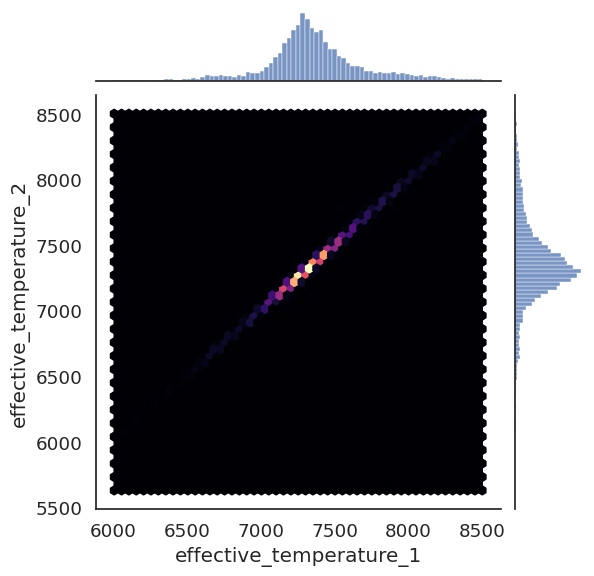

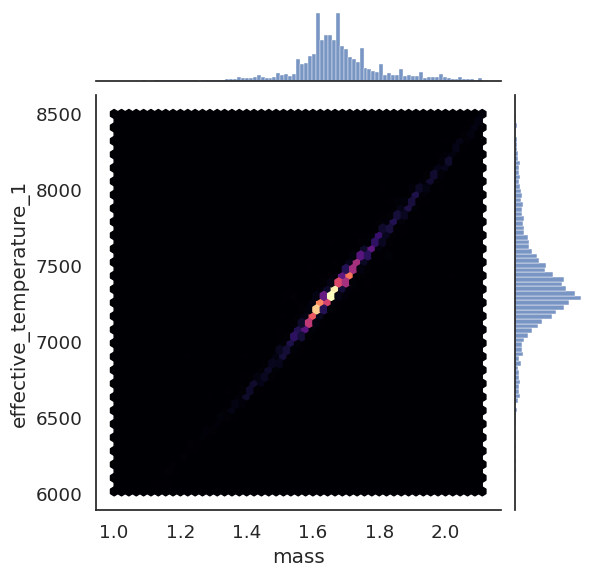

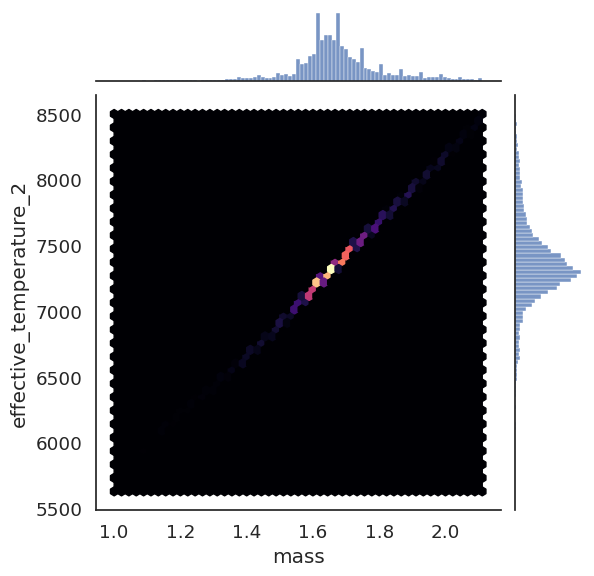

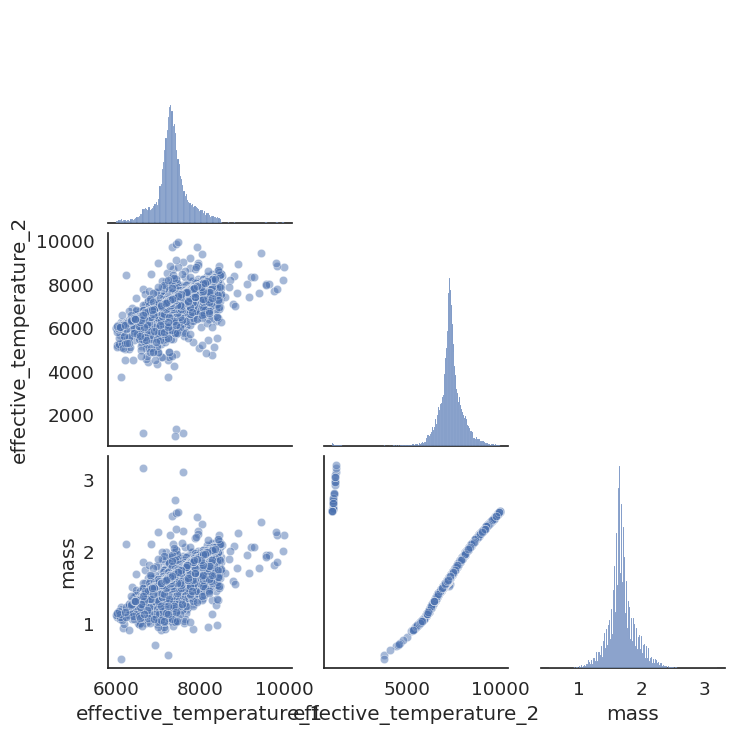

In [13]:
# correlation plots
sns.jointplot(data=df_numeric_T, x='effective_temperature_1', y='effective_temperature_2', kind='hex', cmap='magma')  # Temp1 vs Temp2
sns.jointplot(data=df_numeric_T, x='mass', y='effective_temperature_1', kind='hex', cmap='magma')                     # Mass vs Temp1
sns.jointplot(data=df_numeric_T, x='mass', y='effective_temperature_2', kind='hex', cmap='magma')                     # Mass vs Temp2
plt.show()

# corner plot visualization
sns.pairplot(dfG[['effective_temperature_1', 'effective_temperature_2', 'mass']],  # Selected features
             corner=True,              # Show lower triangle only
             plot_kws={'alpha': 0.5})  # Set transparency

The above analysis shows that the features that are most correlated with the class and subclass classification are the effective temperatures, mass, metallicities, visual magnitude, distance and surface gravity (1). However, the mass and temperature are strongly correlated, and may lead to redundant information in the resulting analysis.

We now perform the same analysis for the luminosity classes.

In [14]:
# convert categorical columns
df_numeric_lum = dfG.drop(['identifier','spt','recno','date','lamost','class','subclass','full_class'], axis=1).copy().dropna()    # Drop non-numeric columns and NA values
#df_numeric_lum['class'] = dfG['class'].astype('category').cat.codes                                # Encode class
#df_numeric_lum['full_class'] = dfG['full_class'].str[0:].astype('category').cat.codes              # Encode full_class
#df_numeric_lum['subclass'] = dfG['subclass'].str[0:].astype('category').cat.codes                  # Encode subclass
df_numeric_lum['luminosity_class'] = dfG['luminosity_class'].dropna().str[0:].astype('category').cat.codes   # Encode luminosity_class

df_numeric_lum  # displays the transformed dataframe

luminosity_class  effective_temperature_1  log_surface_gravity_1  \
1                     1                   7124.0                  4.187   
3                     2                   7254.0                  4.186   
8                     1                   8371.0                  4.472   
16                    2                   7394.0                  4.263   
25                    1                   7115.0                  4.265   
...                 ...                      ...                    ...   
21620                 2                   7690.0                  4.087   
21626                 1                   8340.0                  4.475   
21629                 2                   7554.0                  4.036   
21631                 2                   7475.0                  4.119   
21633                 1                   7327.0                  4.017   

       metallicity_fe_h_1  visual_magnitude  effective_temperature_2  \
1                  -0.367            14.712                   7137.0   
3                  -0.467            12.935                   7232.0   
8                  -0.349            13.887                   8335.0   
16                 -0.428            12.956                   7437.0   
25                 -0.329            15.419                   7115.0   
...                   ...               ...                      ...   
21620               0.044            13.073                   7695.0   
21626               0.073            12.415                   8280.0   
21629              -0.290            10.650                   7559.0   
21631              -0.343            11.774                   7477.0   
21633              -0.043             9.879                   7330.0   

       log_surface_gravity_2  metallicity_fe_h_2  radius   mass  luminosity  \
1                     3.8647             -0.3780   2.440  1.590    13.91443   
3                     4.3071             -0.4705   1.480  1.620     5.39942   
8                     4.4847             -0.3640   1.360  2.060     8.04498   
16                    4.1838             -0.4436   1.747  1.700     8.41672   
25                    4.2183             -0.3300   1.619  1.580     6.04880   
...                      ...                 ...     ...    ...         ...   
21620                 4.2806              0.0490   1.613  1.810     8.21864   
21626                 4.3271              0.0690   1.623  2.040    11.15012   
21629                 3.9900             -0.2760   2.216  1.750    14.44529   
21631                 4.2316             -0.3390   1.663  1.720     7.78983   
21633                 4.1473             -0.0530   1.801  1.661     8.43666   

        distance  
1      3164.3701  
3       905.6660  
8      1664.7900  
16      735.7230  
25     1948.6500  
...          ...  
21620  1283.1500  
21626  1018.4400  
21629   530.9910  
21631   717.9860  
21633   311.7170  

[2993 rows x 12 columns]

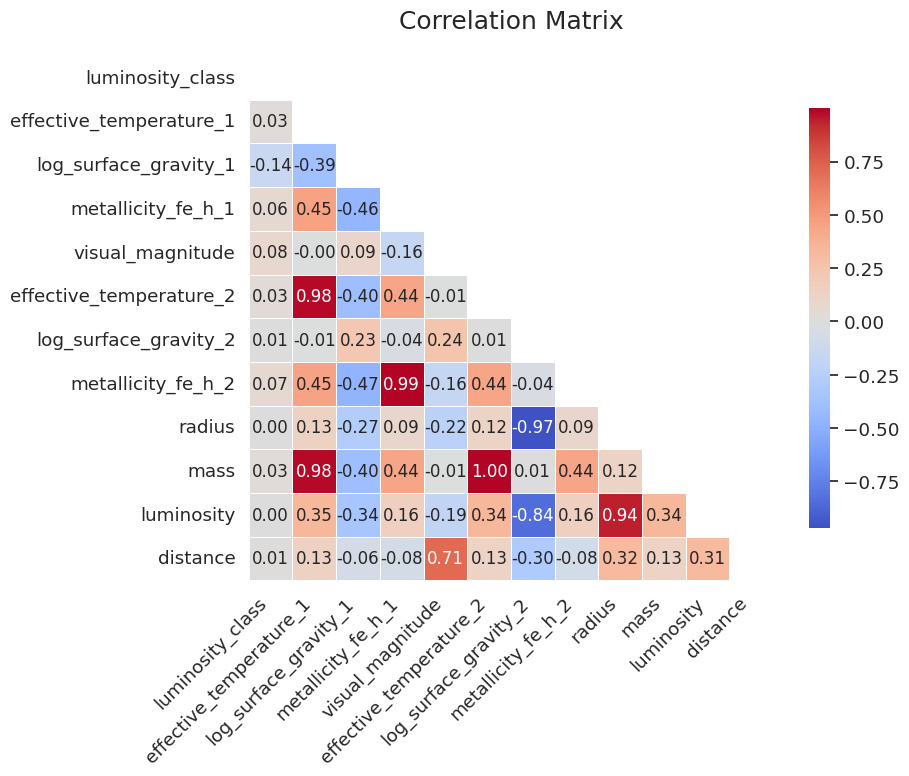

In [15]:
# Drop other non-numeric columns and compute correlation
corr_matrix_lum = df_numeric_lum.corr()
corr_matrix_lum

# Set style and context for better aesthetics
sns.set_theme(style="white", font_scale=1.2)
plt.figure(figsize=(10, 8))

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr_matrix_lum, dtype=bool))

# Create heatmap with custom diverging colormap
heatmap = sns.heatmap(
    corr_matrix_lum,
    mask=mask,  # Hide upper triangle if desired
    annot=True,  # Show correlation values
    fmt=".2f",   # Round to 2 decimals
    cmap="coolwarm",  # Blue (negative) -> Red (positive)
    center=0,    # Center colormap at 0
    square=True,  # Force square cells
    linewidths=0.5,  # Add grid lines
    cbar_kws={"shrink": 0.8},  # Adjust colorbar size
    annot_kws={"size": 12}  # Annotation font size
)

# Improve title and labels
heatmap.set_title("Correlation Matrix", pad=20, fontsize=18)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# Tight layout to avoid cutoff
plt.tight_layout()
plt.show()

The luminosity correlation matrix reveals that the most correlated feature with luminosity class is the surface gravity, with mild contributions from visual magnitude and metalicity. The above also shows that the luminosity, radius, mass and surface gravity seems to be mildly correlated, as can be visualized in the next cell.

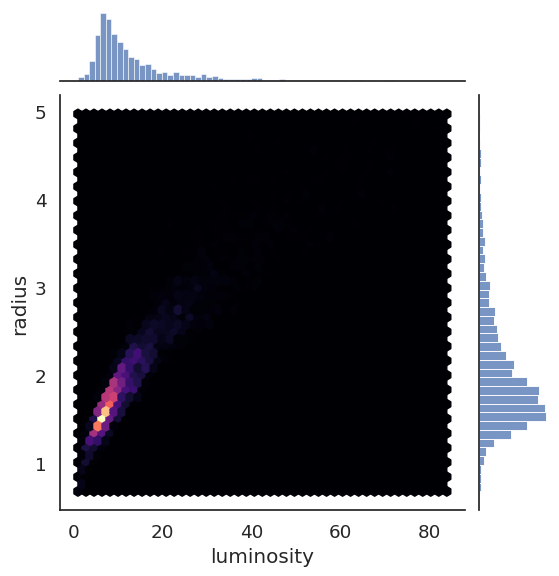

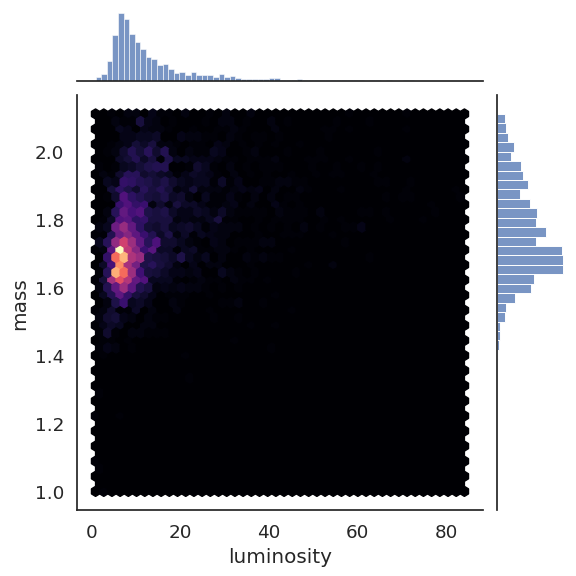

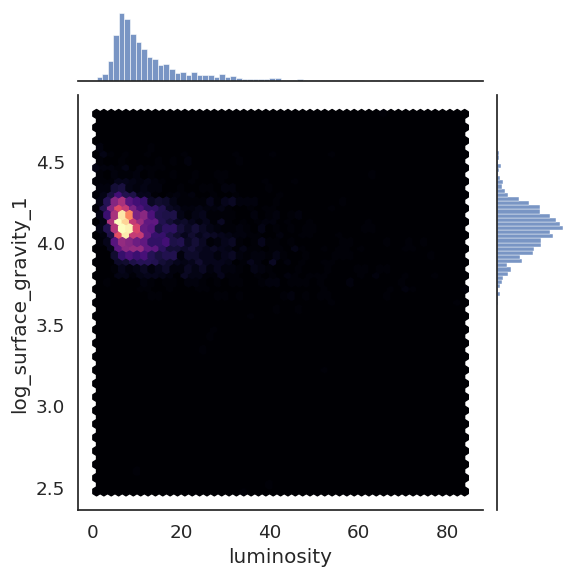

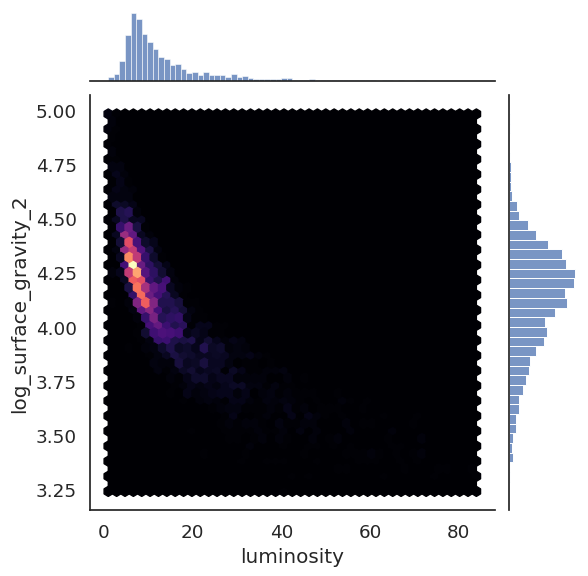

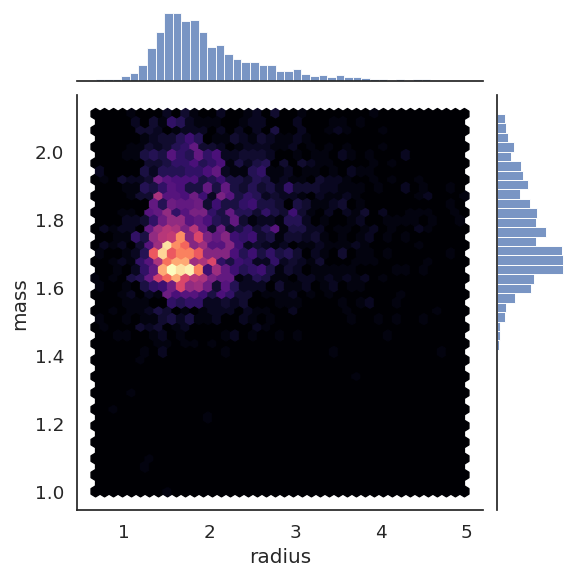

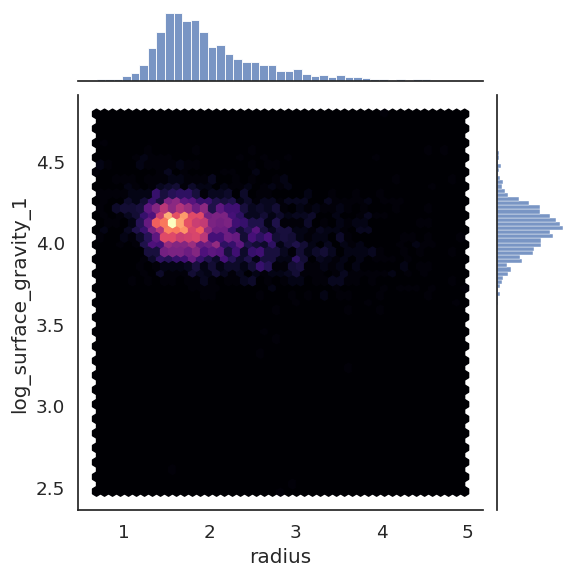

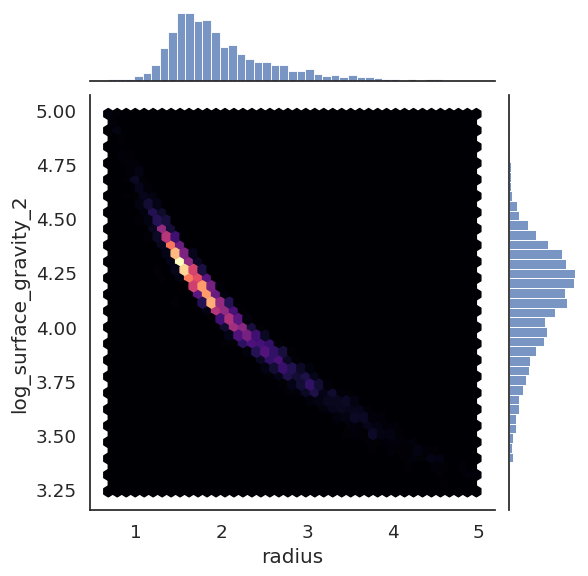

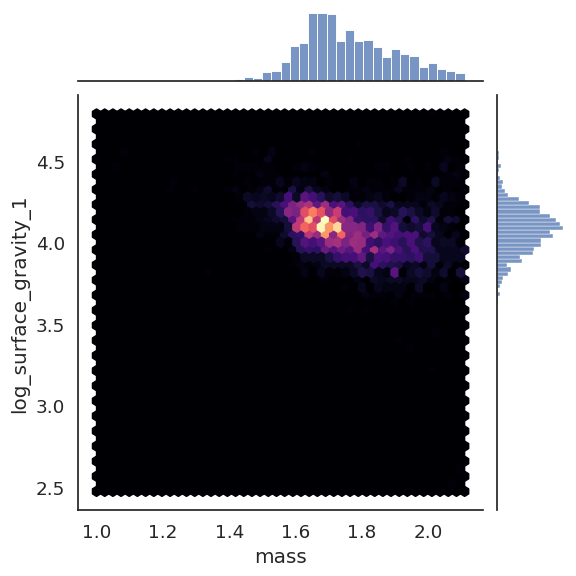

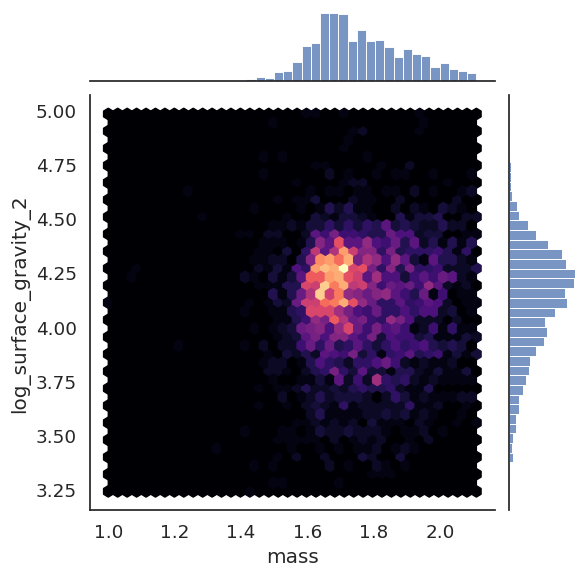

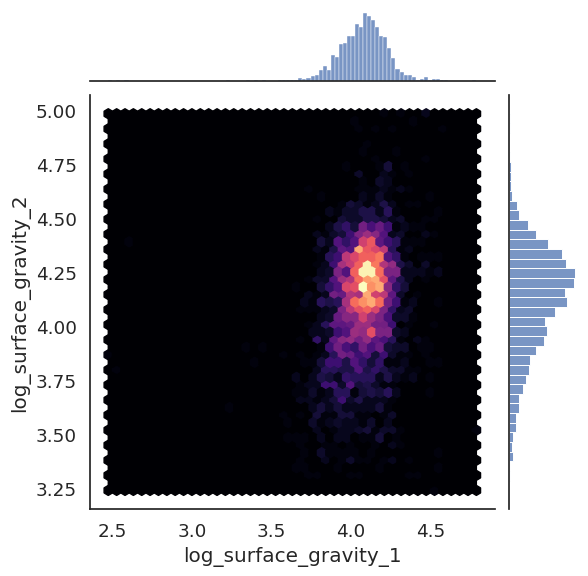

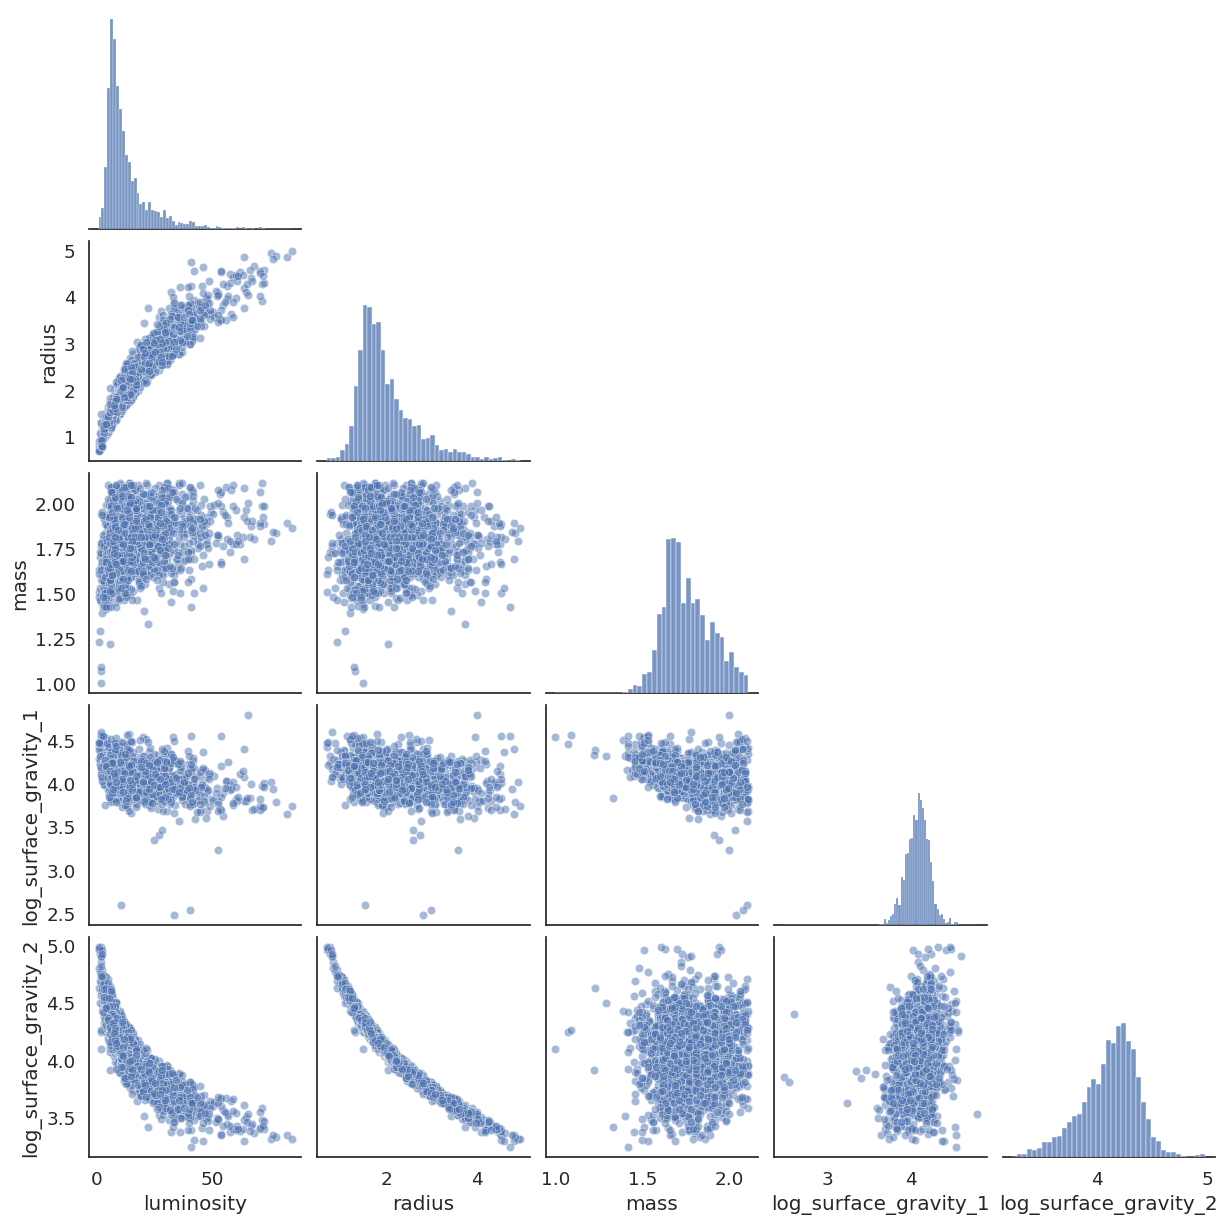

In [16]:
# luminosity cross-correlations
sns.jointplot(data=df_numeric_lum, x='luminosity', y='radius', kind='hex', cmap='magma')  # L-R
sns.jointplot(data=df_numeric_lum, x='luminosity', y='mass', kind='hex', cmap='magma')  # L-M
sns.jointplot(data=df_numeric_lum, x='luminosity', y='log_surface_gravity_1', kind='hex', cmap='magma')  # L-g1
sns.jointplot(data=df_numeric_lum, x='luminosity', y='log_surface_gravity_2', kind='hex', cmap='magma')  # L-g2
sns.jointplot(data=df_numeric_lum, x='radius', y='mass', kind='hex', cmap='magma')  # R-M
sns.jointplot(data=df_numeric_lum, x='radius', y='log_surface_gravity_1', kind='hex', cmap='magma')  # R-g1
sns.jointplot(data=df_numeric_lum, x='radius', y='log_surface_gravity_2', kind='hex', cmap='magma')  # R-g2
sns.jointplot(data=df_numeric_lum, x='mass', y='log_surface_gravity_1', kind='hex', cmap='magma')  # M-g1
sns.jointplot(data=df_numeric_lum, x='mass', y='log_surface_gravity_2', kind='hex', cmap='magma')  # M-g2
sns.jointplot(data=df_numeric_lum, x='log_surface_gravity_1', y='log_surface_gravity_2', kind='hex', cmap='magma')  # g1-g2
plt.show()

# corner plot (compact view)
sns.pairplot(df_numeric_lum[['luminosity','radius','mass',
                           'log_surface_gravity_1','log_surface_gravity_2']],
             corner=True,
             plot_kws={'alpha':0.5})

To conclude this section, we also plot histograms for each one of our relevant variables. We also fit the statistics of the distributions of each quantity, modeled as gaussians. Furthermore, we also check if the different methods to calculate the effective temperatures, surface gravity and metalicity are consistent.

In [17]:
# distribution analysis
from scipy.stats import wasserstein_distance, ks_2samp, norm, skew, kurtosis

# Initialize results storage
results = {}

# Analysis parameters
SIMILARITY_THRESHOLD = 0.1  # 10% of primary std

# Quantities with paired measurements 
paired_quantities = ['effective_temperature_', 'log_surface_gravity_', 'metallicity_fe_h_']  
single_quantities = ['visual_magnitude', 'luminosity', 'mass', 'radius', 'distance']

def get_mode(data):
    """Calculate mode using KDE"""
    kde = stats.gaussian_kde(data)
    x_eval = np.linspace(data.min(), data.max(), 1000)
    return x_eval[np.argmax(kde(x_eval))]

# Analyze paired quantities
for q in paired_quantities:
    data1 = dfG[f'{q}1'].dropna()
    data2 = dfG[f'{q}2'].dropna()
    
    # Distribution properties
    props1 = {
        'mode': get_mode(data1),
        'mu': norm.fit(data1)[0],
        'std': norm.fit(data1)[1],
        'skew': skew(data1),
        'kurtosis': kurtosis(data1)
    }
    
    props2 = {
        'mode': get_mode(data2),
        'mu': norm.fit(data2)[0],
        'std': norm.fit(data2)[1],
        'skew': skew(data2),
        'kurtosis': kurtosis(data2)
    }
    
    # Similarity tests
    ks_stat, ks_p = ks_2samp(data1, data2)
    w_dist = wasserstein_distance(data1, data2)
    is_similar = w_dist < SIMILARITY_THRESHOLD * props1['std']
    
    results[q] = {
        'primary': props1,
        'secondary': props2,
        'comparison': {
            'ks_stat': ks_stat,
            'ks_p': ks_p,
            'w_dist': w_dist,
            'similar': is_similar
        }
    }

# Analyze single quantities  
for q in single_quantities:
    data = dfG[q].dropna()
    results[q] = {
        'mode': get_mode(data),
        'mu': norm.fit(data)[0],
        'std': norm.fit(data)[1],
        'skew': skew(data),
        'kurtosis': kurtosis(data)
    }

# Print results
for q in results:
    print("________________________________")
    if q in paired_quantities:
        print(f"\n{q}1:")
        print(f"  Mode: {results[q]['primary']['mode']:.3f}")
        print(f"  Gaussian μ: {results[q]['primary']['mu']:.3f} ± {results[q]['primary']['std']:.3f}")
        print(f"  Skewness: {results[q]['primary']['skew']:.3f}")
        print(f"  Kurtosis: {results[q]['primary']['kurtosis']:.3f}")
        
        print(f"\n{q}2:") 
        print(f"  Mode: {results[q]['secondary']['mode']:.3f}")
        print(f"  Gaussian μ: {results[q]['secondary']['mu']:.3f} ± {results[q]['secondary']['std']:.3f}")
        print(f"  Skewness: {results[q]['secondary']['skew']:.3f}")
        print(f"  Kurtosis: {results[q]['secondary']['kurtosis']:.3f}")
        
        print(f"\nComparison:")
        similarity = '✅ Similar' if results[q]['comparison']['similar'] else '❌ Different'
        print(f"  {similarity} (Wasserstein: {results[q]['comparison']['w_dist']:.3f})")
        print(f"  KS stat: {results[q]['comparison']['ks_stat']:.3f} (p={results[q]['comparison']['ks_p']:.3f})")
    else:
        print(f"\n{q}:")
        print(f"  Mode: {results[q]['mode']:.3f}")
        print(f"  Gaussian μ: {results[q]['mu']:.3f} ± {results[q]['std']:.3f}")
        print(f"  Skewness: {results[q]['skew']:.3f}")
        print(f"  Kurtosis: {results[q]['kurtosis']:.3f}")

________________________________

effective_temperature_1:
  Mode: 7298.452
  Gaussian μ: 7345.679 ± 388.537
  Skewness: 0.298
  Kurtosis: 2.510

effective_temperature_2:
  Mode: 7296.198
  Gaussian μ: 7351.207 ± 673.275
  Skewness: -1.716
  Kurtosis: 18.078

Comparison:
  ❌ Different (Wasserstein: 164.054)
  KS stat: 0.084 (p=0.000)
________________________________

log_surface_gravity_1:
  Mode: 4.057
  Gaussian μ: 4.047 ± 0.151
  Skewness: -1.384
  Kurtosis: 24.509

log_surface_gravity_2:
  Mode: 4.156
  Gaussian μ: 4.051 ± 0.262
  Skewness: -0.430
  Kurtosis: 0.375

Comparison:
  ❌ Different (Wasserstein: 0.100)
  KS stat: 0.189 (p=0.000)
________________________________

metallicity_fe_h_1:
  Mode: -0.094
  Gaussian μ: -0.023 ± 0.253
  Skewness: -0.249
  Kurtosis: 0.279

metallicity_fe_h_2:
  Mode: -0.090
  Gaussian μ: -0.027 ± 0.251
  Skewness: -0.276
  Kurtosis: 0.210

Comparison:
  ✅ Similar (Wasserstein: 0.004)
  KS stat: 0.011 (p=0.488)
________________________________

visua

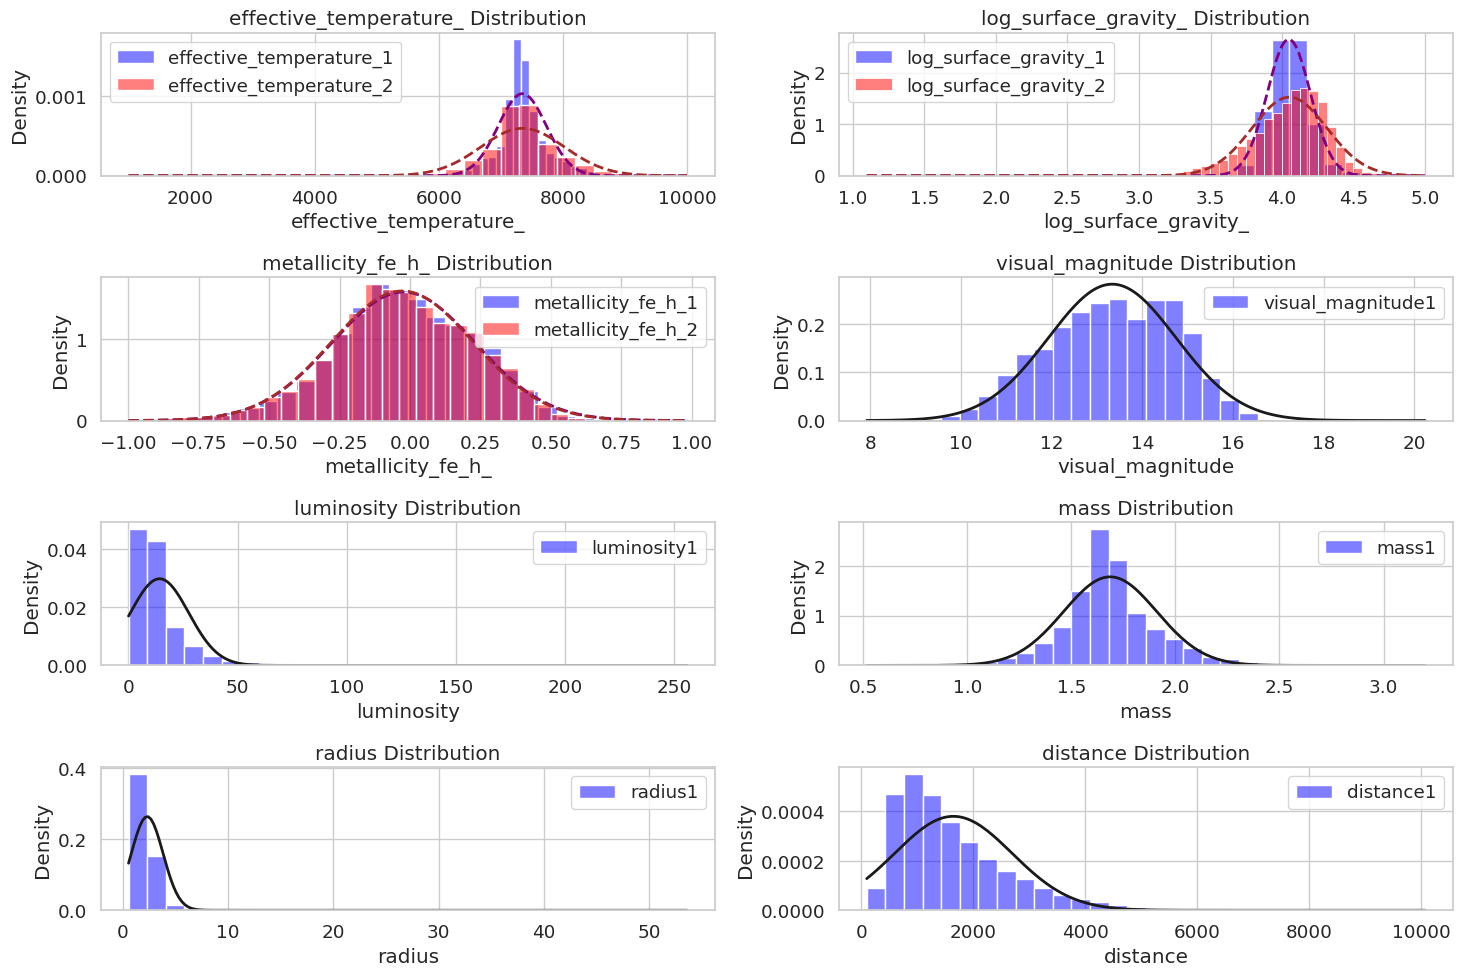

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

quantities =  paired_quantities + single_quantities
for i, q in enumerate(quantities, 1):
    plt.subplot(4, 2, i)
    if q in paired_quantities:
    
        # Plot histograms
        sns.histplot(dfG[f'{q}1'], color='blue', alpha=0.5, label=f'{q}1', bins=30, stat='density')
        sns.histplot(dfG[f'{q}2'], color='red', alpha=0.5, label=f'{q}2', bins=30, stat='density')
        
        # Plot fitted Gaussians
        x = np.linspace(min(dfG[f'{q}1'].min(), dfG[f'{q}2'].min()), 
                        max(dfG[f'{q}1'].max(), dfG[f'{q}2'].max()), 200)
        
        plt.plot(x, stats.norm.pdf(x, results[q]['primary']['mu'], results[q]['primary']['std']), 
                 color='purple', linestyle='--', linewidth=2)
        plt.plot(x, stats.norm.pdf(x, results[q]['secondary']['mu'], results[q]['secondary']['std']), 
                 color='brown', linestyle='--', linewidth=2)

    else:
        # Plot histograms
        sns.histplot(dfG[f'{q}'], color='blue', alpha=0.5, label=f'{q}1', bins=30, stat='density')
        
        # Plot fitted Gaussians
        x = np.linspace(min(dfG[f'{q}'].min(), dfG[f'{q}'].min()), 
                        max(dfG[f'{q}'].max(), dfG[f'{q}'].max()), 200)
        
        plt.plot(x, stats.norm.pdf(x, results[q]['mu'], results[q]['std']), 
                 'k-', linewidth=2)
        
    
    plt.title(f'{q} Distribution')
    plt.legend()
    plt.xlabel(q)

plt.tight_layout()
plt.show()

The above histograms show that the probability distributions of effective temperature, surface gravity, metallicity, visual magnitude and mass are well described by Gaussian distributions. The luminosity, radius and distance distributions on the other hand are more asymetric, as quantified by their respective kurtosis and skewness coefficients, being therefore not well described by Gaussians. An interesting functional form would be a $\chi^{2}$ distribution, which can be tested in the future if needed. 

# 3. Category Analysis

We now turn to analyze the statistics of each one of the individual categories that we wish to classify. To this end, we repeat the above histograms, but split our data into each category.

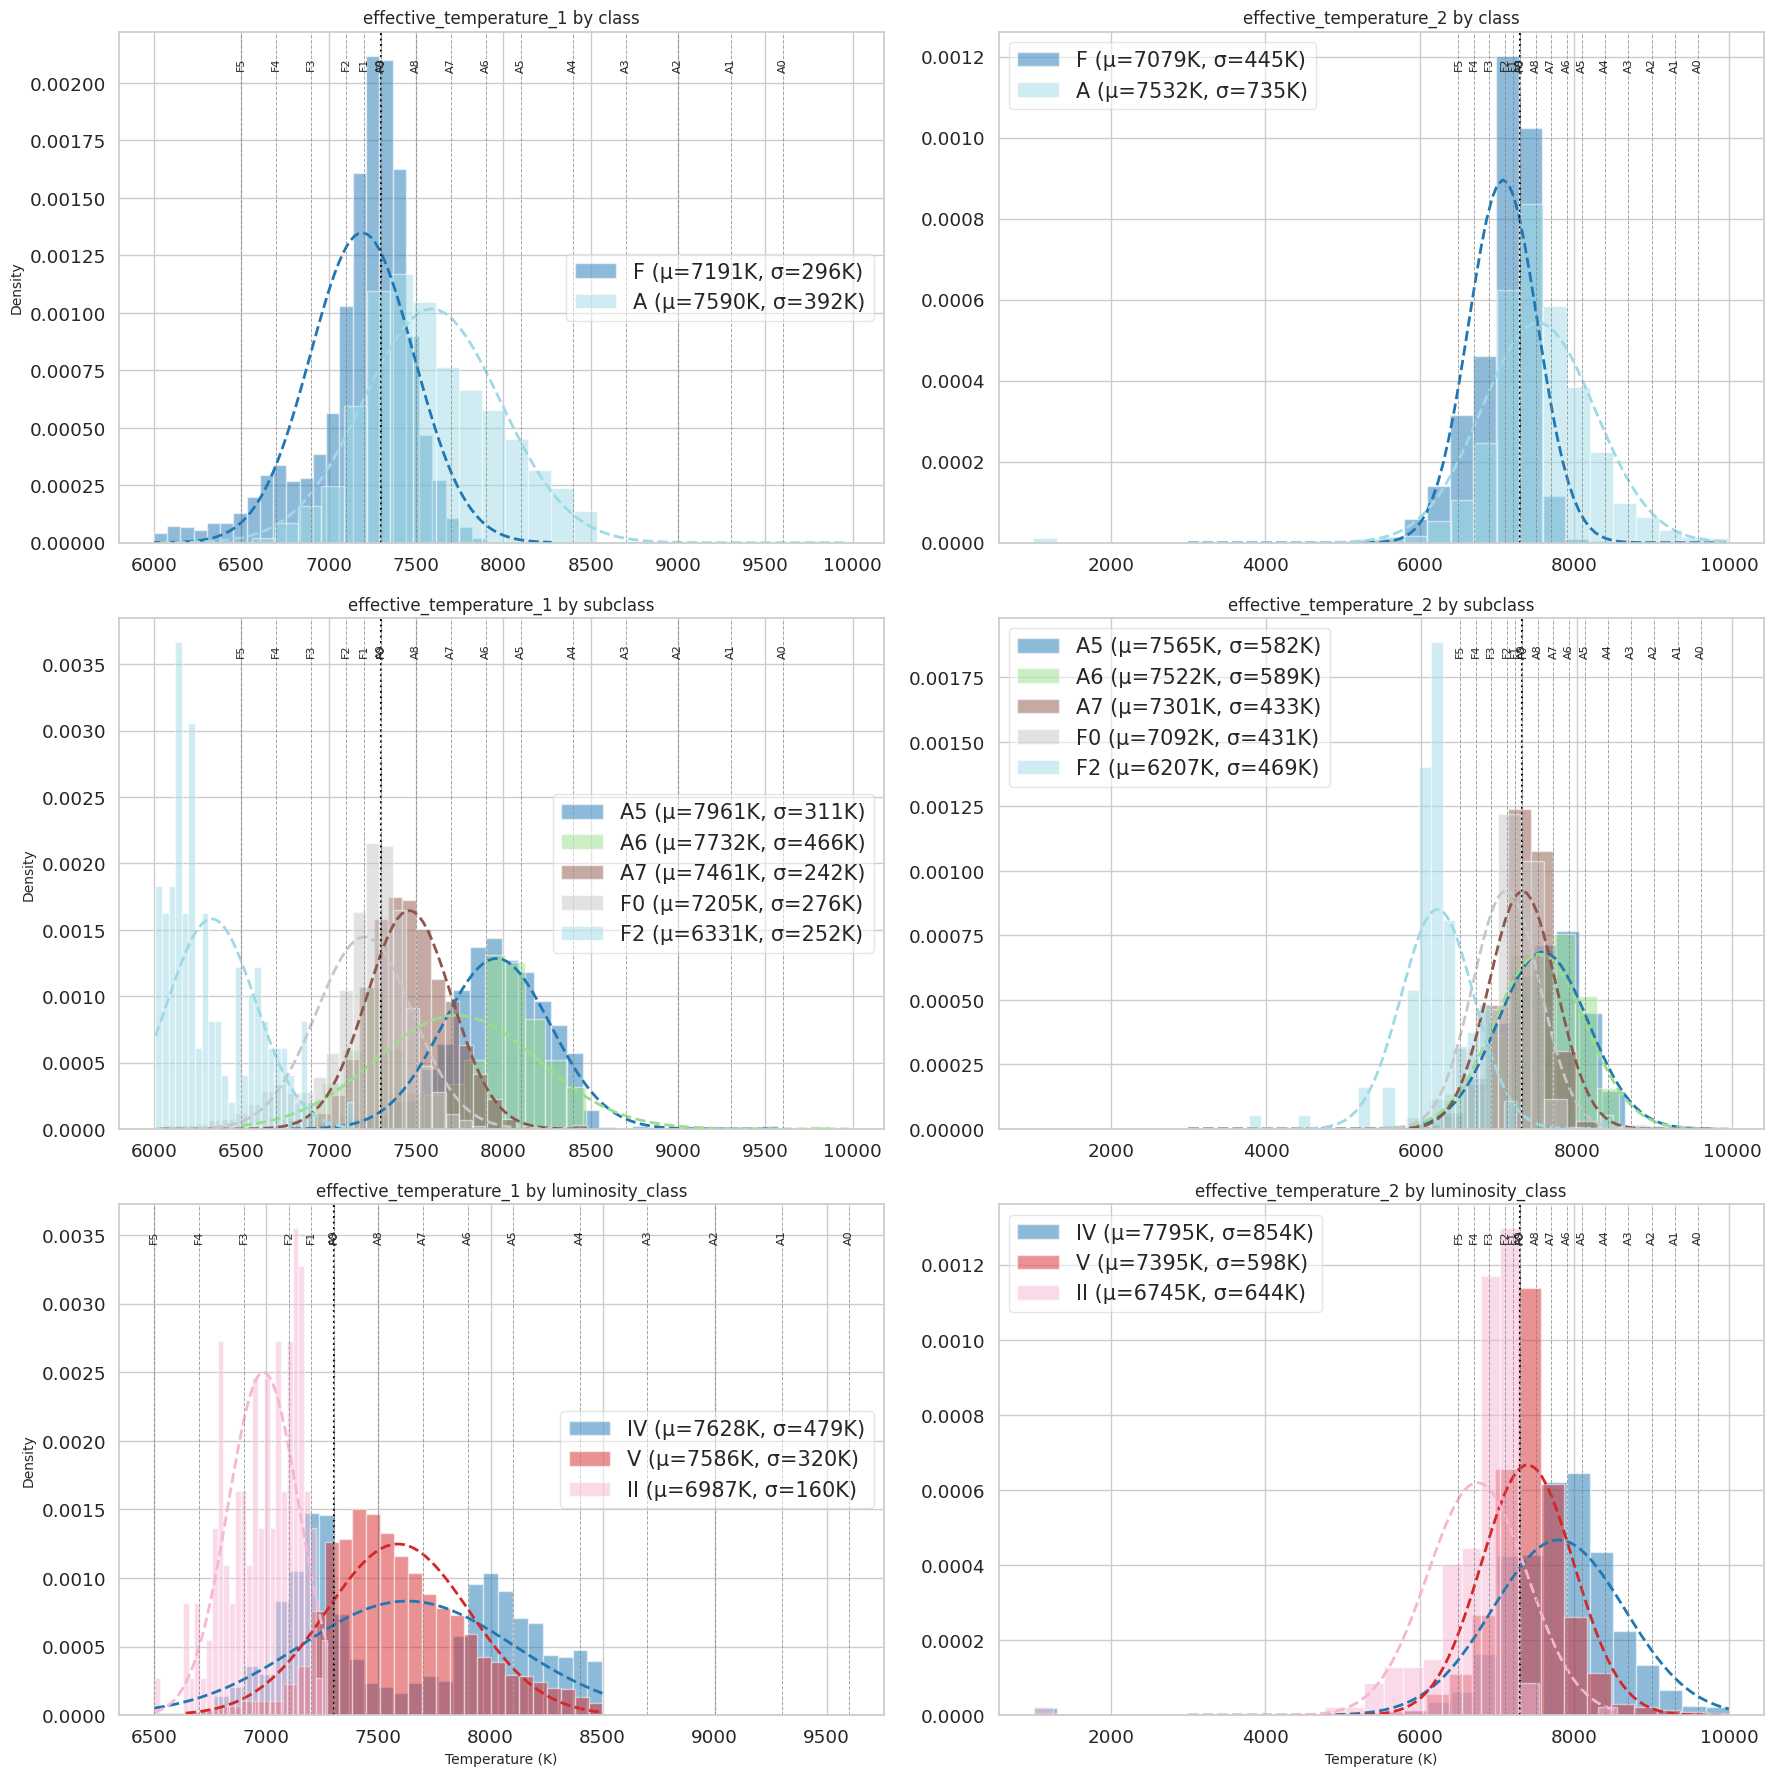

In [19]:
# Harvard classification reference temperatures (K) - A and F classes only
harvard_temps = {
    'A0': 9600, 'A1': 9300, 'A2': 9000, 'A3': 8700, 'A4': 8400, 'A5': 8100,
    'A6': 7900, 'A7': 7700, 'A8': 7500, 'A9': 7300,
    'F0': 7300, 'F1': 7200, 'F2': 7100, 'F3': 6900, 'F4': 6700, 'F5': 6500
}

# Custom subclass filter - modify as needed
selected_subclasses = ['A5','A6','A7','F0','F2']  # Example - adjust based on your data

# Create colormaps for each category
class_colors = plt.cm.tab20(np.linspace(0, 1, len(dfG['class'].unique())))
subclass_colors = plt.cm.tab20(np.linspace(0, 1, len(selected_subclasses)))
lumclass_colors = plt.cm.tab20(np.linspace(0, 1, len(dfG['luminosity_class'].unique())))

# temperature distribution analysis by filtered category
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
temp_cols = ['effective_temperature_1', 'effective_temperature_2']
ref_temp = 7300  # Your specified reference line

# Category processing
categories = {
    'class': (dfG['class'].dropna().unique(), class_colors),
    'subclass': (selected_subclasses, subclass_colors),  # Use filtered subclasses
    'luminosity_class': (dfG['luminosity_class'].dropna().unique(), lumclass_colors)
}

for i, (category, (values, colors)) in enumerate(categories.items()):
    for j, val in enumerate(values):
        if pd.isna(val):  # Skip NaN categories
            continue
            
        # Filter data
        mask = dfG[category] == val
        data1 = dfG.loc[mask, temp_cols[0]].dropna()
        data2 = dfG.loc[mask, temp_cols[1]].dropna()
        
        # Skip if insufficient data
        if len(data1) < 5 or len(data2) < 5:
            continue
            
        # Get color for this category value
        color = colors[j % len(colors)]
            
        # Fit distributions
        mu1, std1 = norm.fit(data1)
        mu2, std2 = norm.fit(data2)
        
        # Generate PDFs
        x1 = np.linspace(max(3000, data1.min()), min(15000, data1.max()), 100)
        pdf1 = norm.pdf(x1, mu1, std1)
        x2 = np.linspace(max(3000, data2.min()), min(15000, data2.max()), 100)
        pdf2 = norm.pdf(x2, mu2, std2)
        
        # Plot left column (Temp1)
        axes[i,0].hist(data1, bins=30, density=True, alpha=0.5,
                      color=color,
                      label=f'{val} (μ={mu1:.0f}K, σ={std1:.0f}K)')
        axes[i,0].plot(x1, pdf1, '--', linewidth=2, color=color)
        
        # Plot right column (Temp2)
        axes[i,1].hist(data2, bins=30, density=True, alpha=0.5,
                      color=color,
                      label=f'{val} (μ={mu2:.0f}K, σ={std2:.0f}K)')
        axes[i,1].plot(x2, pdf2, '--', linewidth=2, color=color)
    
    # Add reference lines
    for ax in axes[i,:]:
        ax.axvline(ref_temp, color='black', linestyle=':', linewidth=1.5)
        for star_type, temp in harvard_temps.items():
            ax.axvline(temp, color='gray', linestyle='--', linewidth=0.7, alpha=0.7)
            if temp > ax.get_xlim()[0] and temp < ax.get_xlim()[1]:
                ax.text(temp, ax.get_ylim()[1]*0.95, star_type, 
                       rotation=90, va='top', ha='center', fontsize=8)

# Formatting
for i, category in enumerate(categories.keys()):
    axes[i,0].set_ylabel('Density', fontsize=10)
    axes[i,0].set_title(f'{temp_cols[0]} by {category}', fontsize=12)
    axes[i,1].set_title(f'{temp_cols[1]} by {category}', fontsize=12)
    axes[i,0].legend(fontsize=15, framealpha=0.5)
    axes[i,1].legend(fontsize=15, framealpha=0.5)

axes[2,0].set_xlabel('Temperature (K)', fontsize=10)
axes[2,1].set_xlabel('Temperature (K)', fontsize=10)
plt.tight_layout()
plt.show()

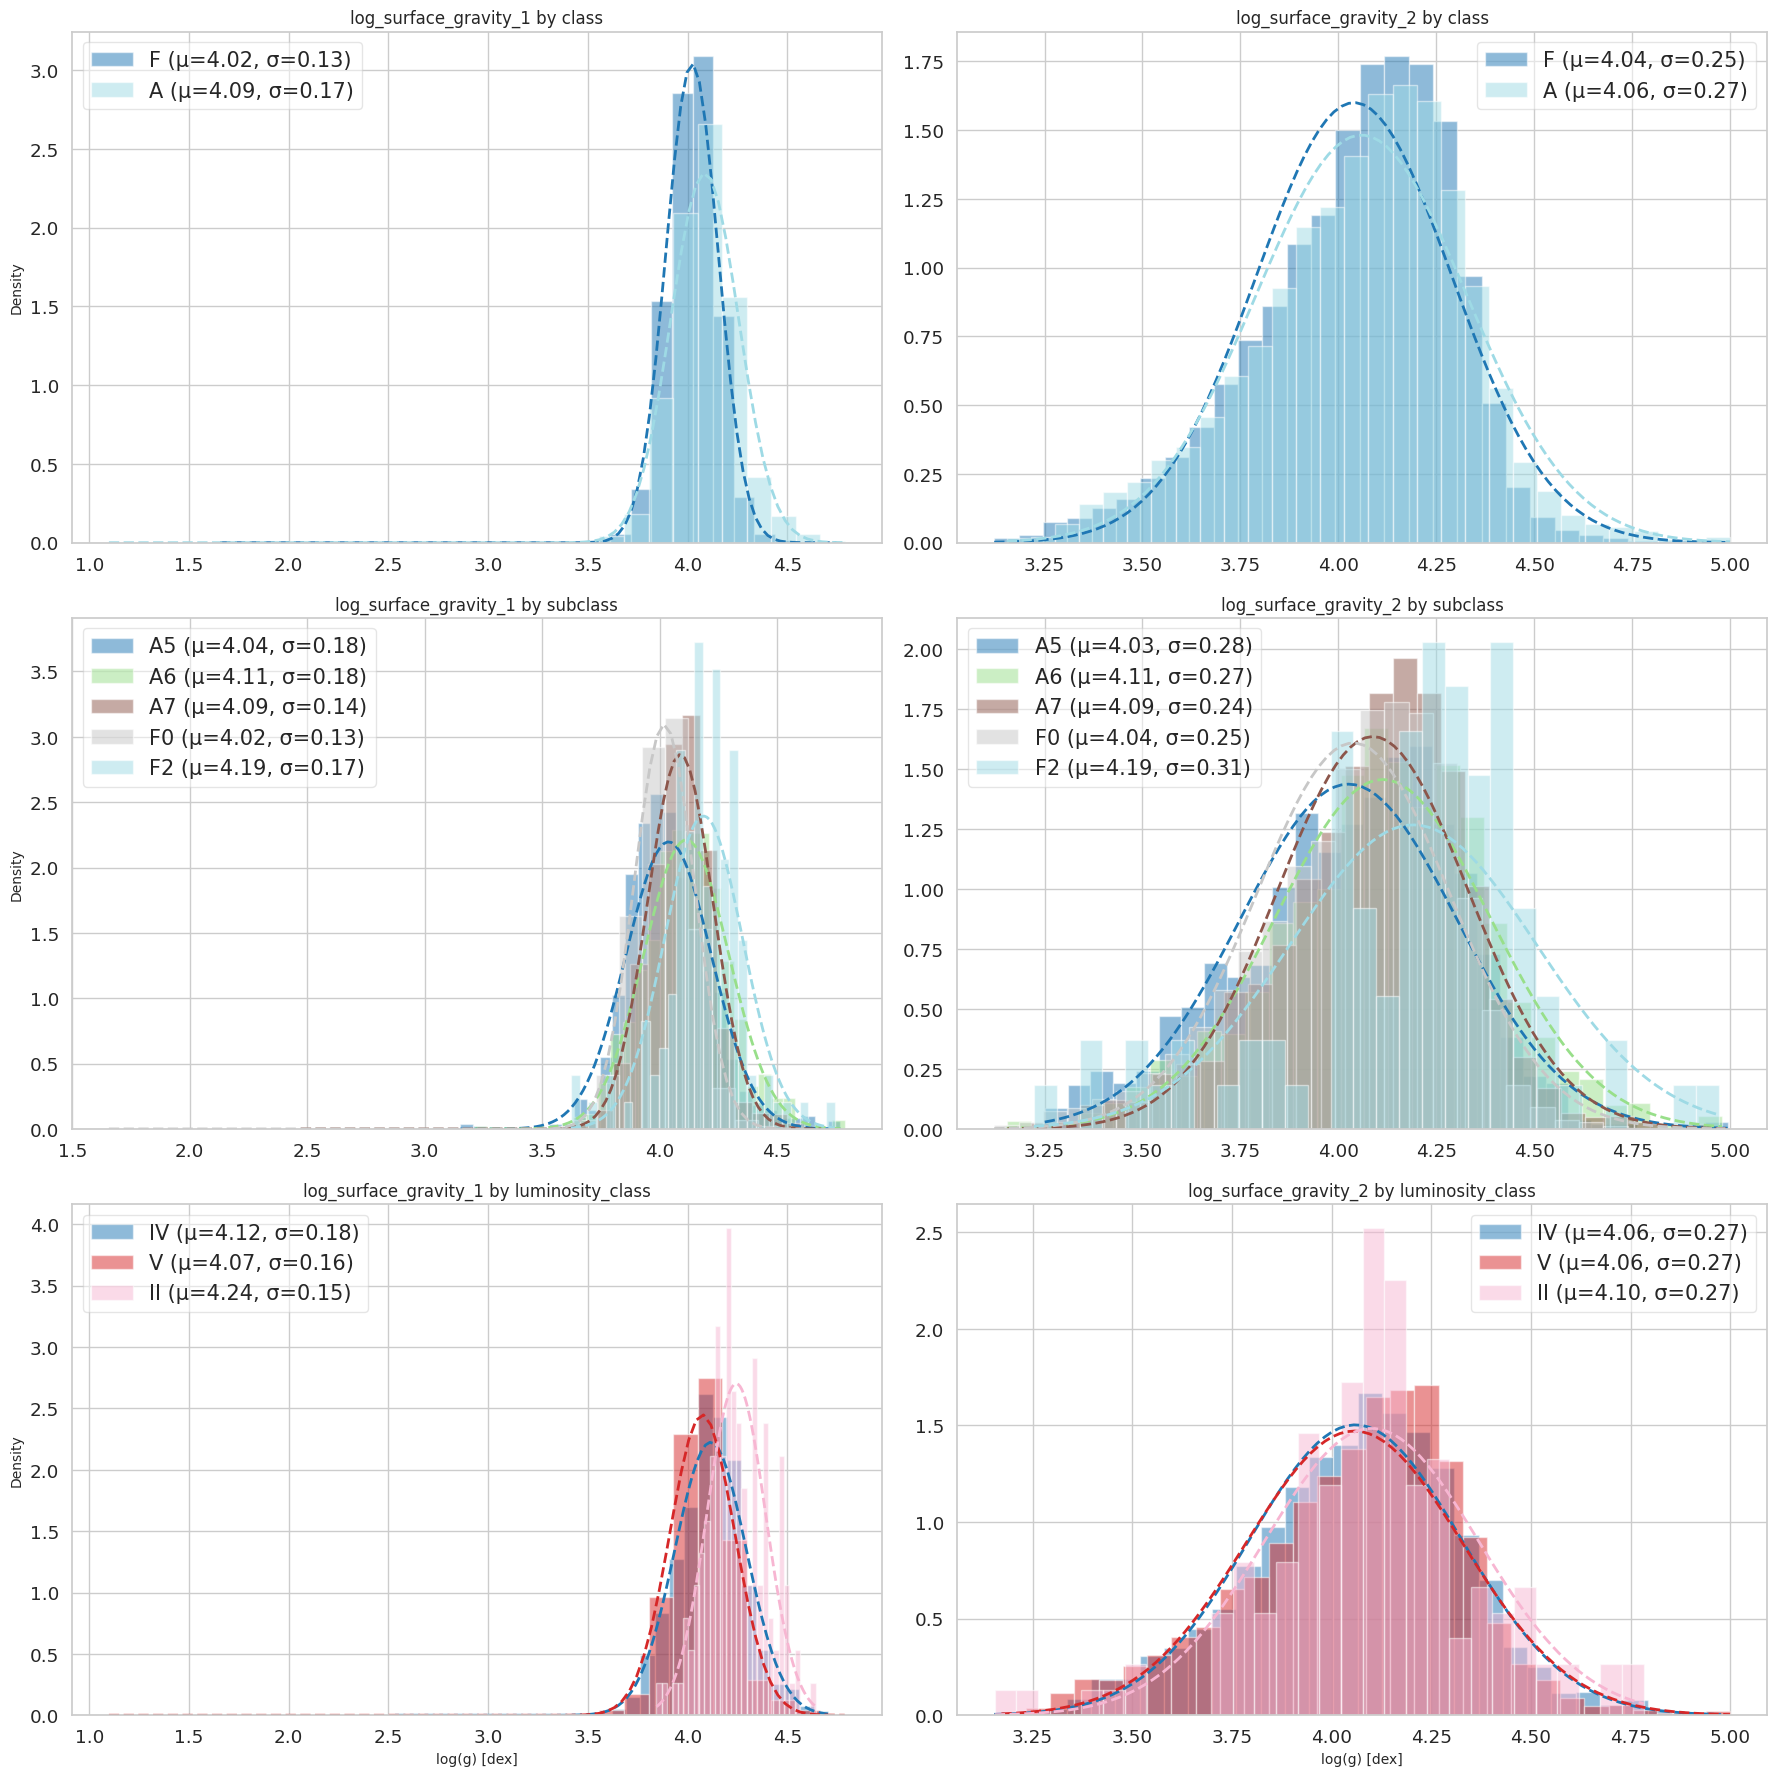

In [20]:
# Surface gravity distribution analysis by filtered category
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
gravity_cols = ['log_surface_gravity_1', 'log_surface_gravity_2']

categories = {
    'class': (dfG['class'].dropna().unique(), class_colors),
    'subclass': (selected_subclasses, subclass_colors),
    'luminosity_class': (dfG['luminosity_class'].dropna().unique(), lumclass_colors)
}

for i, (category, (values, colors)) in enumerate(categories.items()):
    for j, val in enumerate(values):
        if pd.isna(val):
            continue
        mask = dfG[category] == val
        data1 = dfG.loc[mask, gravity_cols[0]].dropna()
        data2 = dfG.loc[mask, gravity_cols[1]].dropna()
        if len(data1) < 5 or len(data2) < 5:
            continue
        color = colors[j % len(colors)]
        mu1, std1 = norm.fit(data1)
        mu2, std2 = norm.fit(data2)
        x1 = np.linspace(data1.min(), data1.max(), 100)
        x2 = np.linspace(data2.min(), data2.max(), 100)
        pdf1 = norm.pdf(x1, mu1, std1)
        pdf2 = norm.pdf(x2, mu2, std2)
        axes[i,0].hist(data1, bins=30, density=True, alpha=0.5, color=color,
                       label=f'{val} (μ={mu1:.2f}, σ={std1:.2f})')
        axes[i,0].plot(x1, pdf1, '--', linewidth=2, color=color)
        axes[i,1].hist(data2, bins=30, density=True, alpha=0.5, color=color,
                       label=f'{val} (μ={mu2:.2f}, σ={std2:.2f})')
        axes[i,1].plot(x2, pdf2, '--', linewidth=2, color=color)

for i, category in enumerate(categories.keys()):
    axes[i,0].set_ylabel('Density', fontsize=10)
    axes[i,0].set_title(f'{gravity_cols[0]} by {category}', fontsize=12)
    axes[i,1].set_title(f'{gravity_cols[1]} by {category}', fontsize=12)
    axes[i,0].legend(fontsize=15, framealpha=0.5)
    axes[i,1].legend(fontsize=15, framealpha=0.5)

axes[2,0].set_xlabel('log(g) [dex]', fontsize=10)
axes[2,1].set_xlabel('log(g) [dex]', fontsize=10)
plt.tight_layout()
plt.show()


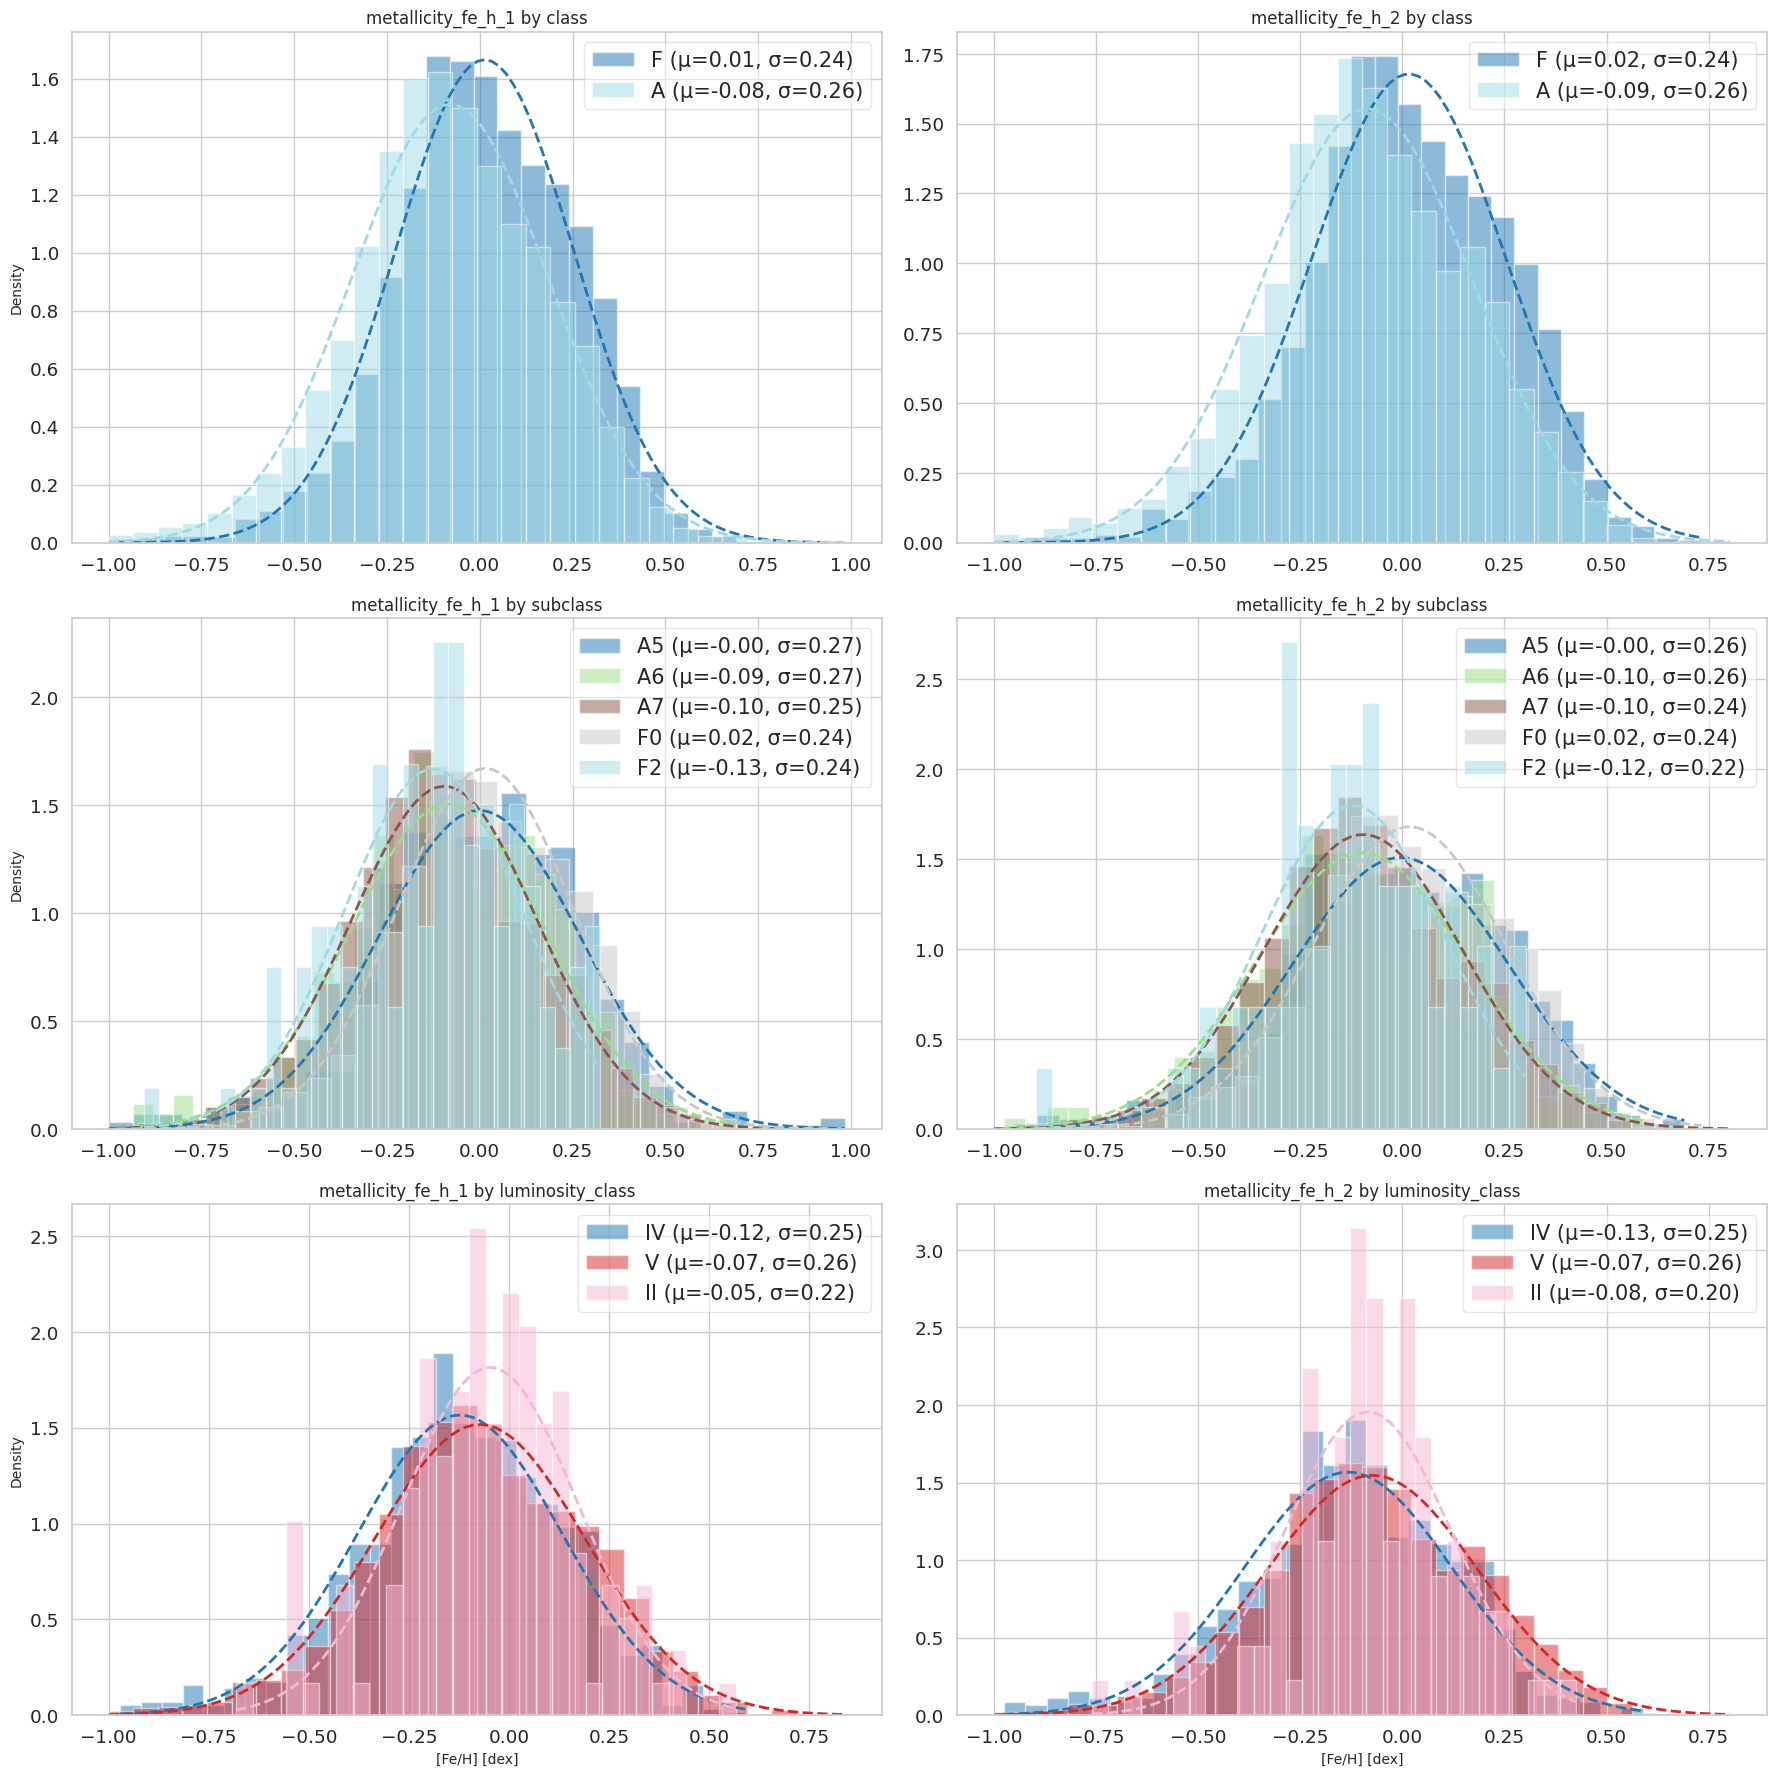

In [21]:
# Metallicity distribution analysis by filtered category
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
metal_cols = ['metallicity_fe_h_1', 'metallicity_fe_h_2']

categories = {
    'class': (dfG['class'].dropna().unique(), class_colors),
    'subclass': (selected_subclasses, subclass_colors),
    'luminosity_class': (dfG['luminosity_class'].dropna().unique(), lumclass_colors)
}

for i, (category, (values, colors)) in enumerate(categories.items()):
    for j, val in enumerate(values):
        if pd.isna(val):
            continue
        mask = dfG[category] == val
        data1 = dfG.loc[mask, metal_cols[0]].dropna()
        data2 = dfG.loc[mask, metal_cols[1]].dropna()
        if len(data1) < 5 or len(data2) < 5:
            continue
        color = colors[j % len(colors)]
        mu1, std1 = norm.fit(data1)
        mu2, std2 = norm.fit(data2)
        x1 = np.linspace(data1.min(), data1.max(), 100)
        x2 = np.linspace(data2.min(), data2.max(), 100)
        pdf1 = norm.pdf(x1, mu1, std1)
        pdf2 = norm.pdf(x2, mu2, std2)
        axes[i,0].hist(data1, bins=30, density=True, alpha=0.5, color=color,
                       label=f'{val} (μ={mu1:.2f}, σ={std1:.2f})')
        axes[i,0].plot(x1, pdf1, '--', linewidth=2, color=color)
        axes[i,1].hist(data2, bins=30, density=True, alpha=0.5, color=color,
                       label=f'{val} (μ={mu2:.2f}, σ={std2:.2f})')
        axes[i,1].plot(x2, pdf2, '--', linewidth=2, color=color)

for i, category in enumerate(categories.keys()):
    axes[i,0].set_ylabel('Density', fontsize=10)
    axes[i,0].set_title(f'{metal_cols[0]} by {category}', fontsize=12)
    axes[i,1].set_title(f'{metal_cols[1]} by {category}', fontsize=12)
    axes[i,0].legend(fontsize=15, framealpha=0.5)
    axes[i,1].legend(fontsize=15, framealpha=0.5)

axes[2,0].set_xlabel('[Fe/H] [dex]', fontsize=10)
axes[2,1].set_xlabel('[Fe/H] [dex]', fontsize=10)
plt.tight_layout()
plt.show()


The above histograms show clearly that, as expected, the effective temperature feature is by far the one that best splits our data into the different classes of stars. The effective surface gravity and metallicity do not appear to be particularly useful to classify neither in temperature class nor in luminosity class.

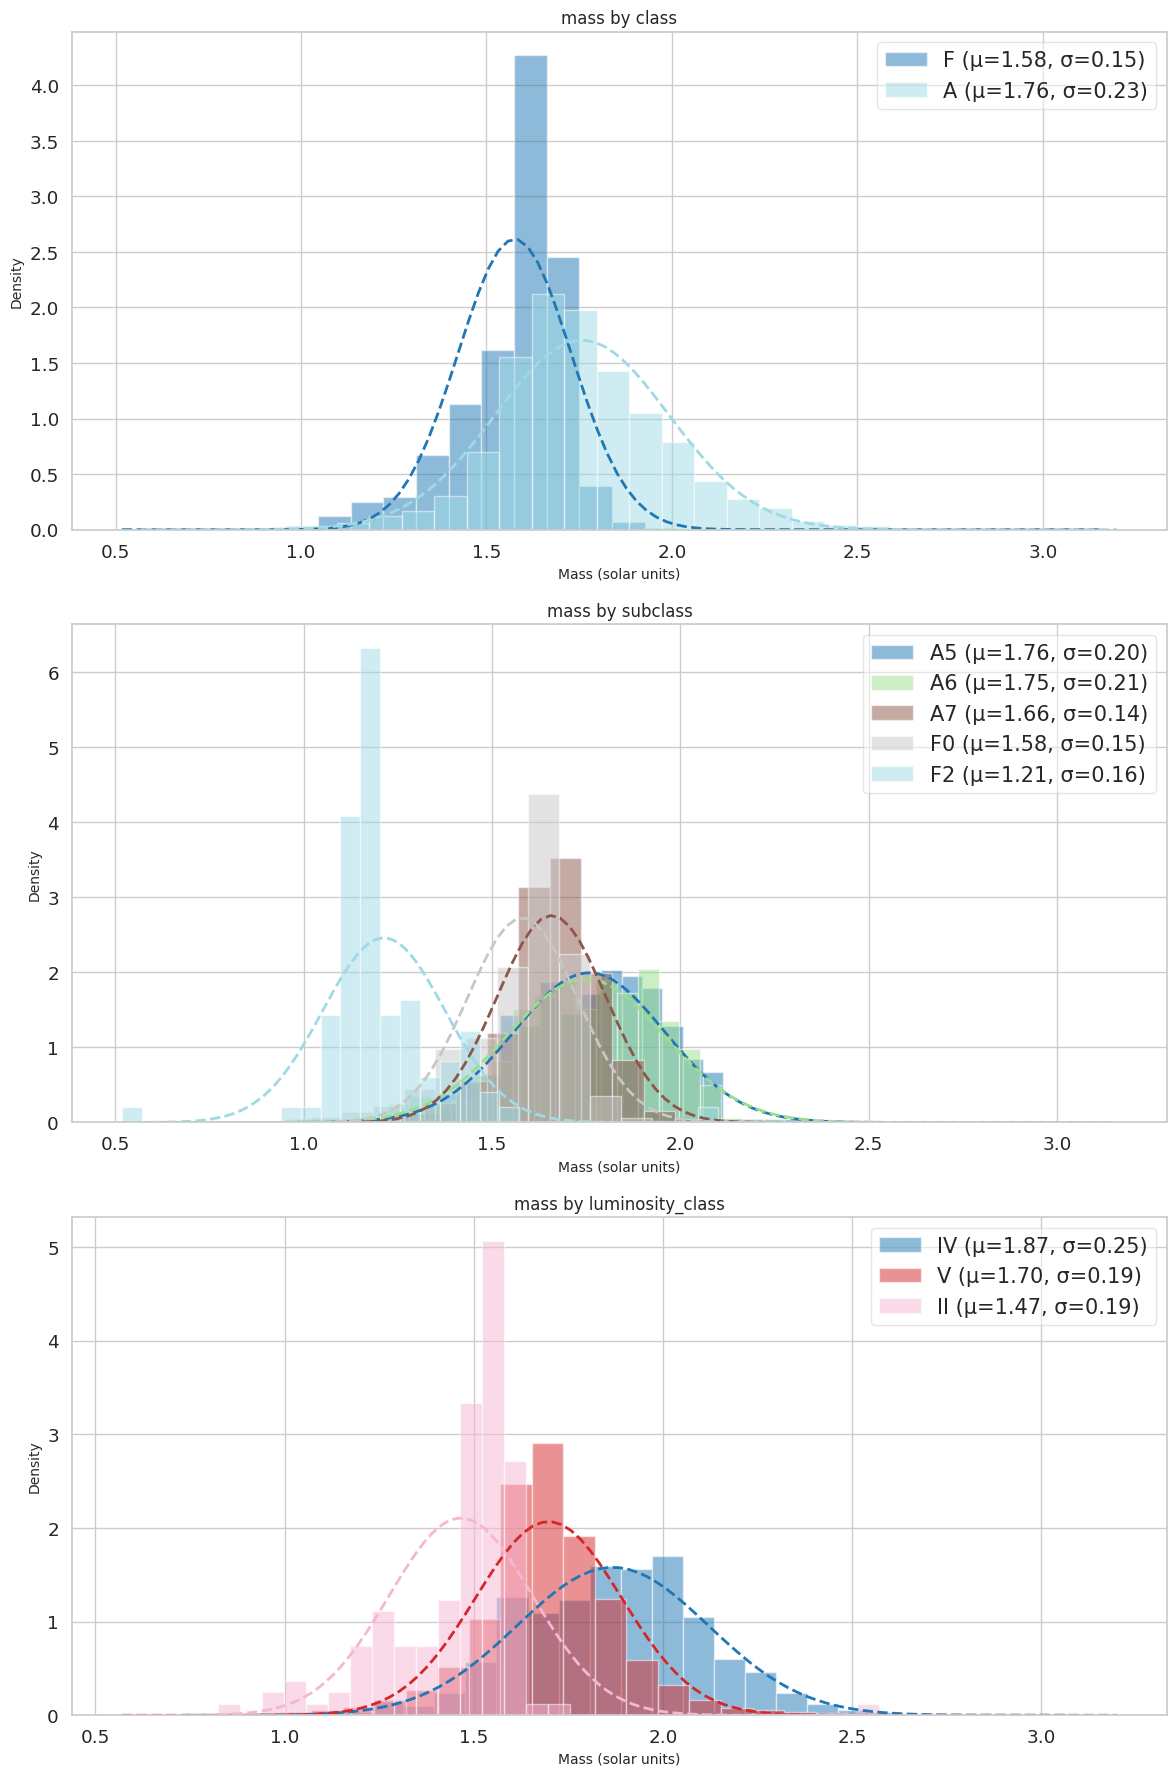

In [22]:
# Mass distribution analysis by filtered category
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
mass_col = 'mass'  # Column for mass values

# Category processing
categories = {
    'class': (dfG['class'].dropna().unique(), class_colors),
    'subclass': (selected_subclasses, subclass_colors),
    'luminosity_class': (dfG['luminosity_class'].dropna().unique(), lumclass_colors)
}

for i, (category, (values, colors)) in enumerate(categories.items()):
    for j, val in enumerate(values):
        if pd.isna(val):  # Skip NaN categories
            continue
        
        # Filter data
        mask = dfG[category] == val
        data = dfG.loc[mask, mass_col].dropna()
        
        # Skip if insufficient data
        if len(data) < 5:
            continue
        
        # Get color for this category value
        color = colors[j % len(colors)]
        
        # Fit distribution
        mu, std = norm.fit(data)
        
        # Generate PDF
        x = np.linspace(data.min(), data.max(), 100)
        pdf = norm.pdf(x, mu, std)
        
        # Plot histogram with Gaussian fit
        axes[i].hist(data, bins=30, density=True, alpha=0.5,
                     color=color,
                     label=f'{val} (μ={mu:.2f}, σ={std:.2f})')
        axes[i].plot(x, pdf, '--', linewidth=2, color=color)

# Formatting
for i, category in enumerate(categories.keys()):
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].set_title(f'{mass_col} by {category}', fontsize=12)
    axes[i].set_xlabel('Mass (solar units)', fontsize=10)
    axes[i].legend(fontsize=15, framealpha=0.5)

plt.tight_layout()
plt.show()


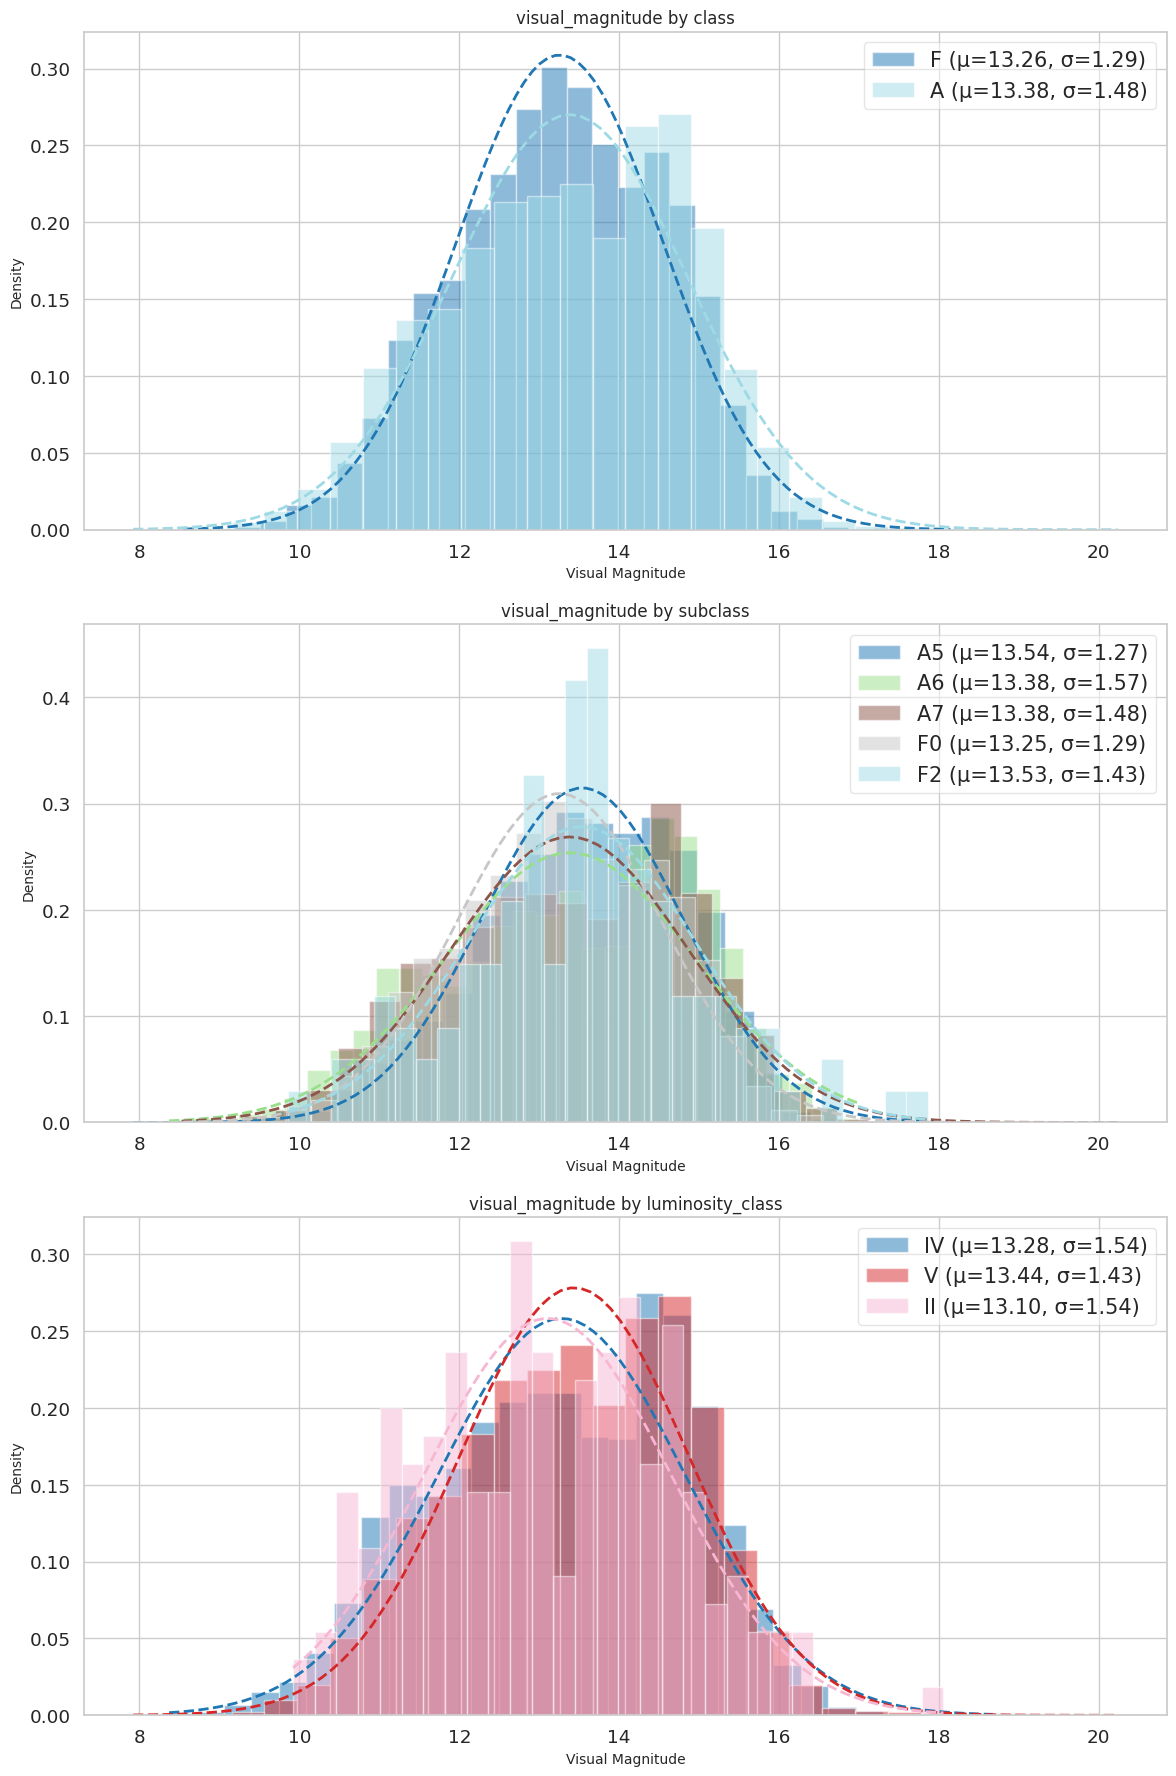

In [23]:
# Visual magnitude distribution analysis by filtered category
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
mag_col = 'visual_magnitude'

categories = {
    'class': (dfG['class'].dropna().unique(), class_colors),
    'subclass': (selected_subclasses, subclass_colors),
    'luminosity_class': (dfG['luminosity_class'].dropna().unique(), lumclass_colors)
}

for i, (category, (values, colors)) in enumerate(categories.items()):
    for j, val in enumerate(values):
        if pd.isna(val):
            continue
        mask = dfG[category] == val
        data = dfG.loc[mask, mag_col].dropna()
        if len(data) < 5:
            continue
        color = colors[j % len(colors)]
        mu, std = norm.fit(data)
        x = np.linspace(data.min(), data.max(), 100)
        pdf = norm.pdf(x, mu, std)
        axes[i].hist(data, bins=30, density=True, alpha=0.5, color=color,
                     label=f'{val} (μ={mu:.2f}, σ={std:.2f})')
        axes[i].plot(x, pdf, '--', linewidth=2, color=color)

for i, category in enumerate(categories.keys()):
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].set_title(f'{mag_col} by {category}', fontsize=12)
    axes[i].set_xlabel('Visual Magnitude', fontsize=10)
    axes[i].legend(fontsize=15, framealpha=0.5)

plt.tight_layout()
plt.show()


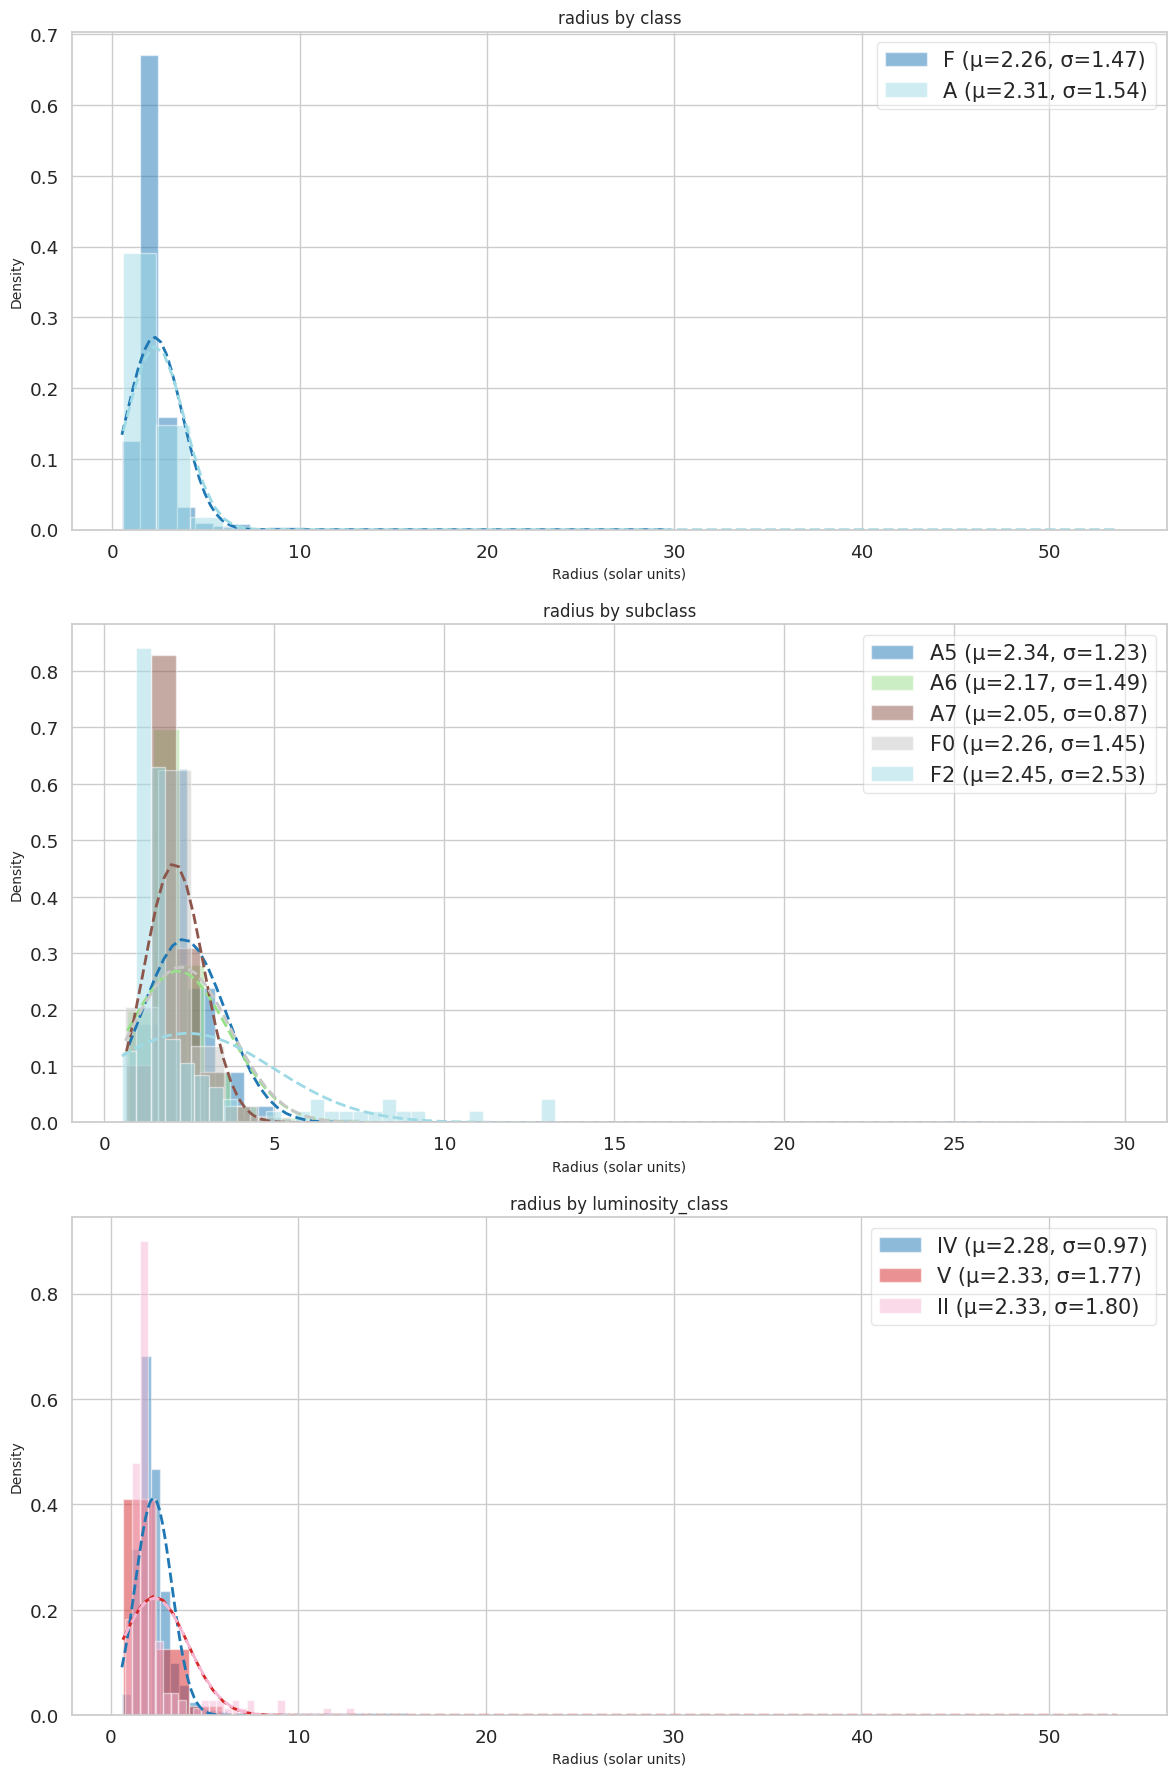

In [24]:
# Radius distribution analysis by filtered category
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
radius_col = 'radius'

categories = {
    'class': (dfG['class'].dropna().unique(), class_colors),
    'subclass': (selected_subclasses, subclass_colors),
    'luminosity_class': (dfG['luminosity_class'].dropna().unique(), lumclass_colors)
}

for i, (category, (values, colors)) in enumerate(categories.items()):
    for j, val in enumerate(values):
        if pd.isna(val):
            continue
        mask = dfG[category] == val
        data = dfG.loc[mask, radius_col].dropna()
        if len(data) < 5:
            continue
        color = colors[j % len(colors)]
        mu, std = norm.fit(data)
        x = np.linspace(data.min(), data.max(), 100)
        pdf = norm.pdf(x, mu, std)
        axes[i].hist(data, bins=30, density=True, alpha=0.5, color=color,
                     label=f'{val} (μ={mu:.2f}, σ={std:.2f})')
        axes[i].plot(x, pdf, '--', linewidth=2, color=color)

for i, category in enumerate(categories.keys()):
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].set_title(f'{radius_col} by {category}', fontsize=12)
    axes[i].set_xlabel('Radius (solar units)', fontsize=10)
    axes[i].legend(fontsize=15, framealpha=0.5)

plt.tight_layout()
plt.show()


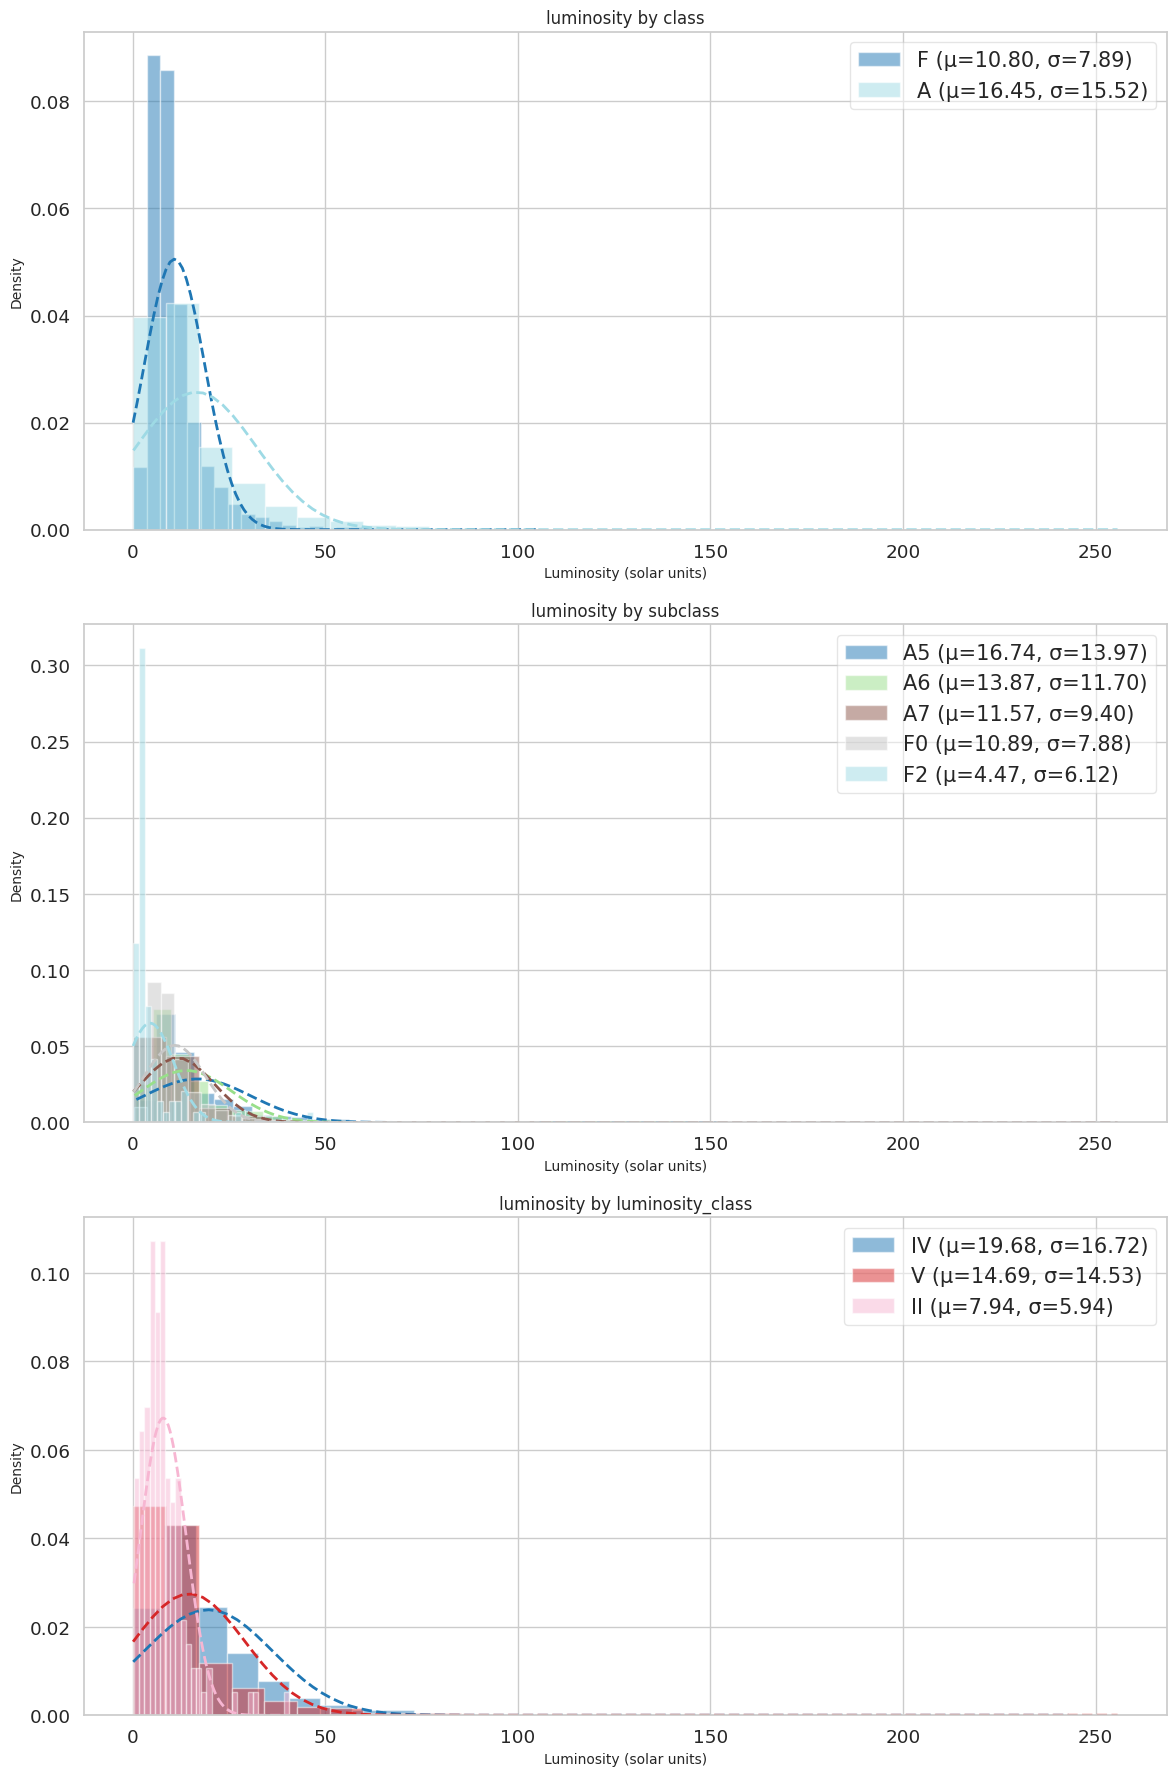

In [25]:
# Luminosity distribution analysis by filtered category
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
lum_col = 'luminosity'

categories = {
    'class': (dfG['class'].dropna().unique(), class_colors),
    'subclass': (selected_subclasses, subclass_colors),
    'luminosity_class': (dfG['luminosity_class'].dropna().unique(), lumclass_colors)
}

for i, (category, (values, colors)) in enumerate(categories.items()):
    for j, val in enumerate(values):
        if pd.isna(val):
            continue
        mask = dfG[category] == val
        data = dfG.loc[mask, lum_col].dropna()
        if len(data) < 5:
            continue
        color = colors[j % len(colors)]
        mu, std = norm.fit(data)
        x = np.linspace(data.min(), data.max(), 100)
        pdf = norm.pdf(x, mu, std)
        axes[i].hist(data, bins=30, density=True, alpha=0.5, color=color,
                     label=f'{val} (μ={mu:.2f}, σ={std:.2f})')
        axes[i].plot(x, pdf, '--', linewidth=2, color=color)

for i, category in enumerate(categories.keys()):
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].set_title(f'{lum_col} by {category}', fontsize=12)
    axes[i].set_xlabel('Luminosity (solar units)', fontsize=10)
    axes[i].legend(fontsize=15, framealpha=0.5)

plt.tight_layout()
plt.show()


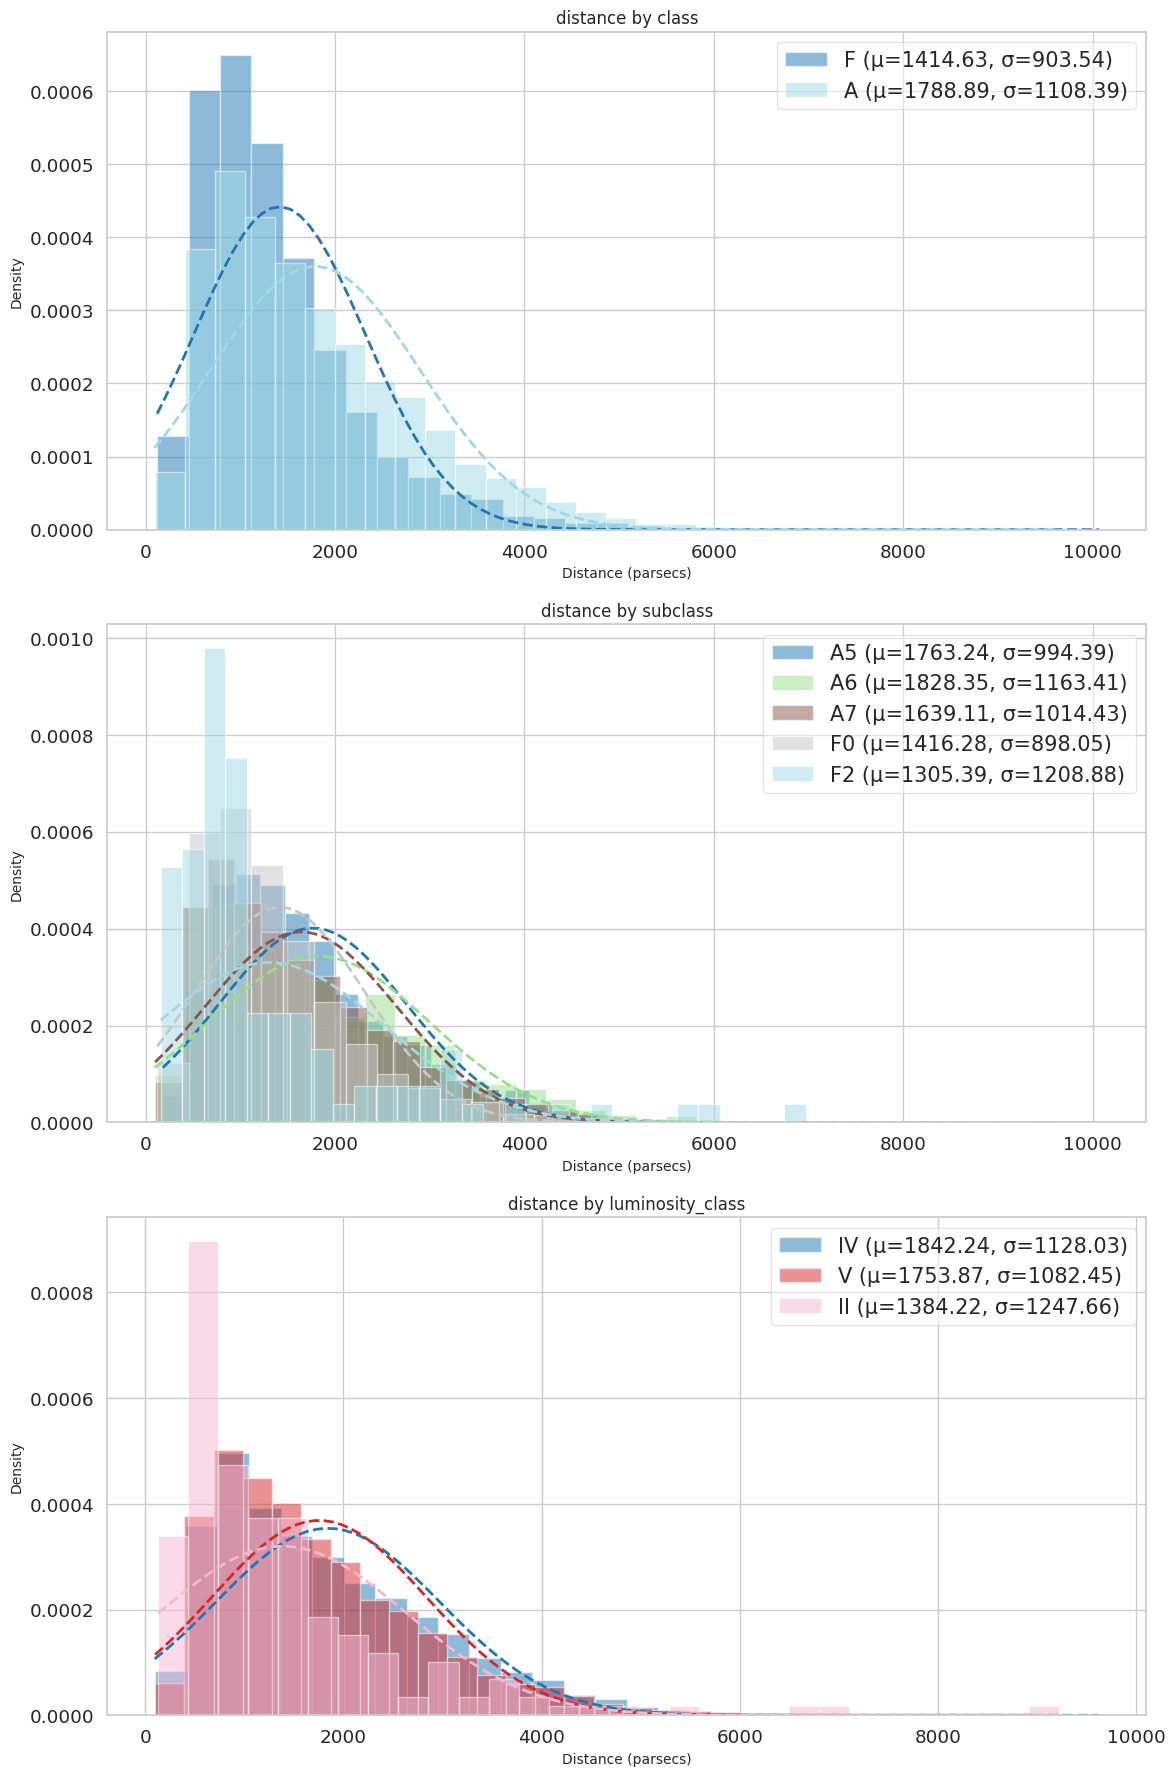

In [26]:
# Distance distribution analysis by filtered category
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
dist_col = 'distance'

categories = {
    'class': (dfG['class'].dropna().unique(), class_colors),
    'subclass': (selected_subclasses, subclass_colors),
    'luminosity_class': (dfG['luminosity_class'].dropna().unique(), lumclass_colors)
}

for i, (category, (values, colors)) in enumerate(categories.items()):
    for j, val in enumerate(values):
        if pd.isna(val):
            continue
        mask = dfG[category] == val
        data = dfG.loc[mask, dist_col].dropna()
        if len(data) < 5:
            continue
        color = colors[j % len(colors)]
        mu, std = norm.fit(data)
        x = np.linspace(data.min(), data.max(), 100)
        pdf = norm.pdf(x, mu, std)
        axes[i].hist(data, bins=30, density=True, alpha=0.5, color=color,
                     label=f'{val} (μ={mu:.2f}, σ={std:.2f})')
        axes[i].plot(x, pdf, '--', linewidth=2, color=color)

for i, category in enumerate(categories.keys()):
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].set_title(f'{dist_col} by {category}', fontsize=12)
    axes[i].set_xlabel('Distance (parsecs)', fontsize=10)
    axes[i].legend(fontsize=15, framealpha=0.5)

plt.tight_layout()
plt.show()


From the above histograms, one concludes that the mass and visual magnitude features are the ones that best split the data into different types. Those will be the main features to be used on our machine learning classifying model.